In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import g_key

In [ ]:
file = 'res/1_2.csv'
df = pd.read_csv(file)

file1 = 'res/3coord.csv'
df1 = pd.read_csv(file1)

file2 = 'res/4coord.csv'
df2 = pd.read_csv(file2)

file4 = 'res/5coord.csv'
df4 = pd.read_csv(file4)

file5 = 'res/6coord.csv'
df5 = pd.read_csv(file5)

file6 = 'res/7coord.csv'
df6 = pd.read_csv(file6)

file7 = 'res/8coord.csv'
df7 = pd.read_csv(file7)

file8 = 'res/9coord.csv'
df8 = pd.read_csv(file8)

file9 = 'res/10coord.csv'
df9 = pd.read_csv(file9)


In [3]:
new_df = pd.concat([df,df1,df2,df4,df5,df6,df7,df8,df9], join='outer')
new_df.head()
new_df = new_df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','region_2'])
new_df['year'] = new_df['title']


new_df.head()


,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,Lat,Lng,heat weights,year
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,41.387933,-7.276971,7,Quinta dos Avidagos 2011 Avidagos Red (Douro)
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,40.089829,-88.248177,7,Rainstorm 2013 Pinot Gris (Willamette Valley)
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,42.212252,-85.891725,7,St. Julian 2013 Reserve Late Harvest Riesling ...
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,42.343889,-71.101111,7,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,32.905753,-117.230246,7,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...


In [4]:
new_df['year'] = new_df['year'].str.extract('(\d+)')

In [5]:
new_df.to_csv('winedf')

In [6]:
group_df = new_df.groupby(new_df['variety'])
group_mean = group_df.mean()
group_mean_price = group_mean.sort_values(by='price')
group_mean_points = group_mean.sort_values(by='points')
group_mean_price

,points,price,Lat,Lng,heat weights
variety,,,,,
Trajadura,86.000000,7.000000,41.207587,-8.308216,6.000000
Malagouzia-Chardonnay,86.000000,8.000000,37.225606,-95.716202,6.000000
Macabeo-Moscatel,85.000000,8.000000,39.929755,-3.012023,5.000000
Shiraz-Tempranillo,82.000000,8.500000,35.779821,-58.875590,2.000000
Johannisberg Riesling,86.250000,8.875000,42.743756,-108.887464,6.250000
...,...,...,...,...,...
Malbec-Cabernet,91.666667,113.333333,16.631590,-77.746702,11.666667
Rosenmuskateller,92.000000,150.000000,45.784283,-108.520048,12.000000
Francisa,91.000000,160.000000,21.538743,82.168644,11.000000


In [7]:
group_mean_points

,points,price,Lat,Lng,heat weights
variety,,,,,
Chancellor,80.500000,16.0,40.394104,-81.916138,0.500000
Airen,81.666667,9.0,41.538212,-2.911664,1.666667
Picapoll,82.000000,21.0,41.864185,1.972414,2.000000
Shiraz-Tempranillo,82.000000,8.5,35.779821,-58.875590,2.000000
Aidani,82.000000,27.0,43.679592,-114.362361,2.000000
...,...,...,...,...,...
Riesling-Chardonnay,94.000000,40.0,40.945028,-72.277470,14.000000
Bual,94.333333,100.0,38.144699,-86.890734,14.333333
Tinta del Pais,95.000000,47.5,42.029839,-37.711981,15.000000


In [8]:
group_pnt_df = new_df.groupby(new_df['points'])

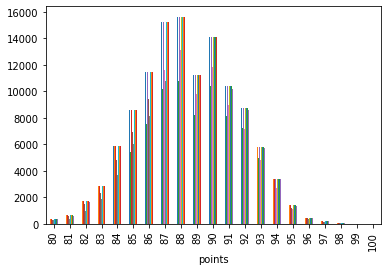

In [9]:
group_pnt = group_pnt_df.count()
group_pnt.plot(kind='bar',legend=False)

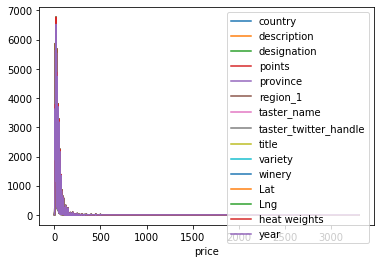

In [10]:
group_prc_df = new_df.groupby(new_df['price'])
group_price = group_prc_df.count()
group_price.plot()

In [ ]:
#base_url =f'http://climateapi.scottpinkelman.com/api/v1/location/{latitude}/{logintitude}'
    
#response = requests.get(base_url)
#print(response.url)
#places_data = response.json()
#places_data
for index, row in new_df.iterrows():
    latitute = row['Lat']
    logintitude = row['Lng']
    print(f"Retrieving Results for {row['winery']}.")
    base_url =f'http://climateapi.scottpinkelman.com/api/v1/location/{latitute}/{logintitude}'
    response = requests.get(base_url)
    print(response.url)
    
    try:
        places_data = response.json()
        #print(places_data)
        results = places_data['return_values'][0]
        #print(results)
        zone = results['koppen_geiger_zone']
        zone_desc = results['zone_description']
        print(zone)
        df.loc[index, 'Climate Zone'] = zone
        df.loc[index, 'Climate Zone Desc.'] = zone_desc
        new_df.to_csv('winedf_loc_cz.csv')
        
        
    except:
        print("Could not identify the Climate Zone.")

Retrieving Results for Quinta dos Avidagos.
http://climateapi.scottpinkelman.com/api/v1/location/41.3879331/-7.276971400000001
Csb
Retrieving Results for Rainstorm.
http://climateapi.scottpinkelman.com/api/v1/location/40.08982879999999/-88.2481766
Dfa
Retrieving Results for St. Julian.
http://climateapi.scottpinkelman.com/api/v1/location/42.21225219999999/-85.89172479999998
Dfa
Retrieving Results for Sweet Cheeks.
http://climateapi.scottpinkelman.com/api/v1/location/42.343888899999996/-71.1011111
Dfa
Retrieving Results for Tandem.
http://climateapi.scottpinkelman.com/api/v1/location/32.9057531/-117.2302457
BSk
Retrieving Results for Terre di Giurfo.
http://climateapi.scottpinkelman.com/api/v1/location/37.1112433/14.632728699999998
Csa
Retrieving Results for Trimbach.
http://climateapi.scottpinkelman.com/api/v1/location/48.1949046/7.3260159
Cfb
Retrieving Results for Heinz Eifel.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Jean-

Retrieving Results for Hindsight.
http://climateapi.scottpinkelman.com/api/v1/location/28.8634581/-82.01574670000001
Cfa
Retrieving Results for Mulvane Wine Co..
http://climateapi.scottpinkelman.com/api/v1/location/37.475493/-97.3241166
Cfa
Retrieving Results for Schmitt Söhne.
http://climateapi.scottpinkelman.com/api/v1/location/39.093810600000005/-76.63212209999998
Cfa
Retrieving Results for Yalumba.
http://climateapi.scottpinkelman.com/api/v1/location/-34.5131355/139.0565116
BSk
Retrieving Results for Z'IVO.
http://climateapi.scottpinkelman.com/api/v1/location/45.127568100000005/-123.1187881
Csb
Retrieving Results for Aresti.
http://climateapi.scottpinkelman.com/api/v1/location/32.470674/-97.559511
Cfa
Retrieving Results for Spyro.
http://climateapi.scottpinkelman.com/api/v1/location/41.0541667/-85.2261111
Dfa
Retrieving Results for Lionel Osmin & Cie.
http://climateapi.scottpinkelman.com/api/v1/location/43.326190000000004/-0.3296535
Cfb
Retrieving Results for Mitolo.
http://climate

Retrieving Results for Terra Valentine.
http://climateapi.scottpinkelman.com/api/v1/location/38.5229576/-122.54896389999999
Csb
Retrieving Results for Testarossa.
http://climateapi.scottpinkelman.com/api/v1/location/37.21347799999999/-121.981544
Csb
Retrieving Results for Vincent Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/34.652697499999995/-120.0948277
Csb
Retrieving Results for Vincent Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/34.652697499999995/-120.0948277
Csb
Retrieving Results for Weingut Liebfrauenstift.
http://climateapi.scottpinkelman.com/api/v1/location/49.638290000000005/8.36892
Cfb
Retrieving Results for Wrath.
http://climateapi.scottpinkelman.com/api/v1/location/36.40920699999999/-121.38520700000001
Csb
Retrieving Results for Yardstick.
http://climateapi.scottpinkelman.com/api/v1/location/37.371094/-121.925574
Csb
Retrieving Results for Herdade Grande.
http://climateapi.scottpinkelman.com/api/v1/location/38.1874922/-7.838358700000

Retrieving Results for Robert Mondavi.
http://climateapi.scottpinkelman.com/api/v1/location/38.4412684/-122.40980230000001
Csb
Retrieving Results for Samuel Tinon.
http://climateapi.scottpinkelman.com/api/v1/location/48.243419700000004/21.432648899999997
Cfb
Retrieving Results for Sixteen by Twenty.
http://climateapi.scottpinkelman.com/api/v1/location/41.9625914/-70.6693879
Cfa
Retrieving Results for St. Pauls.
http://climateapi.scottpinkelman.com/api/v1/location/37.518034899999996/-95.1730355
Cfa
Retrieving Results for Mendel.
http://climateapi.scottpinkelman.com/api/v1/location/41.920648/-88.33438100000001
Dfa
Retrieving Results for Oldenburg.
http://climateapi.scottpinkelman.com/api/v1/location/53.1434501/8.214552099999999
Cfb
Retrieving Results for Oldenburg.
http://climateapi.scottpinkelman.com/api/v1/location/53.1434501/8.214552099999999
Cfb
Retrieving Results for Wagner.
http://climateapi.scottpinkelman.com/api/v1/location/40.6149557/-74.09438229999998
Cfa
Retrieving Results for

Retrieving Results for Finca Sophenia.
http://climateapi.scottpinkelman.com/api/v1/location/34.0930548/-118.37803799999999
Csb
Retrieving Results for Treana.
http://climateapi.scottpinkelman.com/api/v1/location/35.5879453/-120.72135549999999
Csb
Retrieving Results for Ventisquero.
http://climateapi.scottpinkelman.com/api/v1/location/-34.6170546/-71.2511025
Csb
Retrieving Results for Aquinas.
http://climateapi.scottpinkelman.com/api/v1/location/36.132115/-86.84404599999998
Cfa
Retrieving Results for Arboleda.
http://climateapi.scottpinkelman.com/api/v1/location/30.521901500000002/-97.818869
Cfa
Retrieving Results for Benessere.
http://climateapi.scottpinkelman.com/api/v1/location/40.725963899999996/-74.37335829999998
Cfa
Retrieving Results for Buried Cane.
http://climateapi.scottpinkelman.com/api/v1/location/48.9220655/-122.1390398
Cfb
Retrieving Results for Cascina Adelaide.
http://climateapi.scottpinkelman.com/api/v1/location/44.6126534/7.9458787
Cfa
Retrieving Results for Claudia Spr

Retrieving Results for Montresor.
http://climateapi.scottpinkelman.com/api/v1/location/26.472646/-80.11214
Am
Retrieving Results for Ronco del Gelso.
http://climateapi.scottpinkelman.com/api/v1/location/45.949304/13.4774169
Cfa
Retrieving Results for Sebastiani.
http://climateapi.scottpinkelman.com/api/v1/location/38.29323189999999/-122.44941709999999
Csb
Retrieving Results for Elena Walch.
http://climateapi.scottpinkelman.com/api/v1/location/46.3385258/11.2385953
Dfb
Retrieving Results for Gini.
http://climateapi.scottpinkelman.com/api/v1/location/42.345921600000004/-83.0141955
Dfa
Retrieving Results for Borgo Conventi.
http://climateapi.scottpinkelman.com/api/v1/location/45.9135304/13.528000099999998
Cfb
Retrieving Results for Ceago Vinegarden.
http://climateapi.scottpinkelman.com/api/v1/location/39.1085498/-122.816065
Csb
Retrieving Results for Valiano.
http://climateapi.scottpinkelman.com/api/v1/location/43.1479125/11.9021177
Cfb
Retrieving Results for Volpe Pasini.
http://climatea

Retrieving Results for Fattorie Romeo del Castello.
http://climateapi.scottpinkelman.com/api/v1/location/37.8868375/14.982841899999999
Csa
Retrieving Results for Flying Cloud.
http://climateapi.scottpinkelman.com/api/v1/location/44.827176200000004/-93.4610777
Dfa
Retrieving Results for Gadais Père et Fils.
http://climateapi.scottpinkelman.com/api/v1/location/47.144298/-1.422139
Cfb
Retrieving Results for André Brunel.
http://climateapi.scottpinkelman.com/api/v1/location/29.782359999999997/-95.5366051
Cfa
Retrieving Results for Majolini.
http://climateapi.scottpinkelman.com/api/v1/location/45.6335048/10.126497800000001
Cfb
Retrieving Results for Montemercurio.
http://climateapi.scottpinkelman.com/api/v1/location/43.075503000000005/11.7738926
Cfb
Retrieving Results for Philippe Fontaine.
http://climateapi.scottpinkelman.com/api/v1/location/48.0300825/4.369076600000001
Cfb
Retrieving Results for Pillitteri.
http://climateapi.scottpinkelman.com/api/v1/location/43.2292472/-79.11398630000001

Retrieving Results for Prospect 772.
http://climateapi.scottpinkelman.com/api/v1/location/38.038356/-120.624826
Csa
Retrieving Results for Qupé.
http://climateapi.scottpinkelman.com/api/v1/location/34.9188571/-120.29823970000001
Csb
Retrieving Results for Qupé.
http://climateapi.scottpinkelman.com/api/v1/location/34.9188571/-120.29823970000001
Csb
Retrieving Results for Rex Hill.
http://climateapi.scottpinkelman.com/api/v1/location/45.314319399999995/-122.9197436
Csb
Retrieving Results for Ruby.
http://climateapi.scottpinkelman.com/api/v1/location/36.117263/-95.8893
Cfa
Retrieving Results for Structure.
http://climateapi.scottpinkelman.com/api/v1/location/30.2095554/-93.34777690000001
Cfa
Retrieving Results for Testarossa.
http://climateapi.scottpinkelman.com/api/v1/location/37.21347799999999/-121.981544
Csb
Retrieving Results for Tumwater.
http://climateapi.scottpinkelman.com/api/v1/location/47.007318700000006/-122.90930630000001
Csb
Retrieving Results for Wittmann.
http://climateapi.

Retrieving Results for Trinity River.
http://climateapi.scottpinkelman.com/api/v1/location/29.743055600000005/-94.7033333
Cfa
Retrieving Results for Vintage Cowboy.
http://climateapi.scottpinkelman.com/api/v1/location/35.304745700000005/-120.37438519999999
Csb
Retrieving Results for Winzer Krems.
http://climateapi.scottpinkelman.com/api/v1/location/48.4203152/15.6181225
Cfb
Retrieving Results for Kontos.
http://climateapi.scottpinkelman.com/api/v1/location/40.9336726/-74.16124609999999
Cfa
Retrieving Results for Landhaus Mayer.
http://climateapi.scottpinkelman.com/api/v1/location/48.2554191/16.3594785
Cfb
Retrieving Results for Lavau.
http://climateapi.scottpinkelman.com/api/v1/location/48.324635/4.086788899999999
Cfb
Retrieving Results for L'Ecole No. 41.
http://climateapi.scottpinkelman.com/api/v1/location/46.0568338/-118.58132260000001
BSk
Retrieving Results for Lyrarakis.
http://climateapi.scottpinkelman.com/api/v1/location/35.184203600000004/25.2085369
Csa
Retrieving Results for M

Retrieving Results for Stoller.
http://climateapi.scottpinkelman.com/api/v1/location/45.241237/-123.07087369999999
Csb
Retrieving Results for Fable Mountain.
http://climateapi.scottpinkelman.com/api/v1/location/-33.351976/19.213151999999997
Csb
Retrieving Results for Vine Cliff.
http://climateapi.scottpinkelman.com/api/v1/location/38.4879514/-122.4495508
Csb
Retrieving Results for Va Piano.
http://climateapi.scottpinkelman.com/api/v1/location/41.880967999999996/-87.62639300000001
Dfa
Retrieving Results for Y Rousseau.
http://climateapi.scottpinkelman.com/api/v1/location/38.2587139/-122.2717063
Csb
Retrieving Results for Monte Volpe.
http://climateapi.scottpinkelman.com/api/v1/location/39.257119/-123.2376142
Csb
Retrieving Results for Palladino.
http://climateapi.scottpinkelman.com/api/v1/location/46.500598/-80.965057
Dfb
Retrieving Results for Paradise Ridge.
http://climateapi.scottpinkelman.com/api/v1/location/39.7638416/-121.60423600000001
Csa
Retrieving Results for Pecchenino.
http:

Retrieving Results for Rascal.
http://climateapi.scottpinkelman.com/api/v1/location/36.2267643/-95.73053859999999
Cfa
Retrieving Results for Terrazas de Los Andes.
http://climateapi.scottpinkelman.com/api/v1/location/-33.0821799/-68.8964474
BWk
Retrieving Results for Herdade Grande.
http://climateapi.scottpinkelman.com/api/v1/location/38.1874922/-7.8383587000000015
Csa
Retrieving Results for Jack's House.
http://climateapi.scottpinkelman.com/api/v1/location/46.35523999999999/-94.161534
Dfb
Retrieving Results for Kiwi Cuvée.
http://climateapi.scottpinkelman.com/api/v1/location/38.62133529999999/-90.21295759999998
Cfa
Retrieving Results for Domaine Michel Goubard.
http://climateapi.scottpinkelman.com/api/v1/location/46.754774499999996/4.7006065
Cfb
Retrieving Results for Domaine Poulleau Père et Fils.
http://climateapi.scottpinkelman.com/api/v1/location/46.99954289999999/4.7806515
Cfb
Retrieving Results for Durigutti.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8

Retrieving Results for Château Haut-Logat.
http://climateapi.scottpinkelman.com/api/v1/location/44.556862/-0.038418
Cfb
Retrieving Results for Château La Branne.
http://climateapi.scottpinkelman.com/api/v1/location/45.377292499999996/-0.9326335
Cfb
Retrieving Results for Château Mayne Vieil.
http://climateapi.scottpinkelman.com/api/v1/location/44.976307/-0.27582940000000006
Cfb
Retrieving Results for Château Mille-Roses.
http://climateapi.scottpinkelman.com/api/v1/location/44.99732410000001/-0.6380653000000001
Cfb
Retrieving Results for Chessman.
http://climateapi.scottpinkelman.com/api/v1/location/46.470167/-112.18996229999999
BSk
Retrieving Results for Deerfield Ranch.
http://climateapi.scottpinkelman.com/api/v1/location/38.4063036/-122.5419918
Csb
Retrieving Results for Domaine Franck Besson.
http://climateapi.scottpinkelman.com/api/v1/location/46.23092330000001/4.6874166
Cfb
Retrieving Results for Efeste.
http://climateapi.scottpinkelman.com/api/v1/location/47.77145170000001/-122.1

Retrieving Results for Greenwood Ridge.
http://climateapi.scottpinkelman.com/api/v1/location/39.097879600000006/-123.4843354
Csb
Retrieving Results for Herencia.
http://climateapi.scottpinkelman.com/api/v1/location/39.3682936/-3.356525
BSk
Retrieving Results for J. Scott Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/44.0540094/-123.1679395
Csb
Retrieving Results for Chateau Dereszla.
http://climateapi.scottpinkelman.com/api/v1/location/29.743232/-95.461971
Cfa
Retrieving Results for Quinta do Vallado.
http://climateapi.scottpinkelman.com/api/v1/location/41.162005/-7.766782000000001
Csb
Retrieving Results for Vall Llach.
http://climateapi.scottpinkelman.com/api/v1/location/41.188326/0.8567170000000001
Csa
Retrieving Results for Château Bel-Air Ortet.
http://climateapi.scottpinkelman.com/api/v1/location/45.264809899999996/-0.7717824000000001
Cfb
Retrieving Results for Château Ferrière.
http://climateapi.scottpinkelman.com/api/v1/location/45.0432789/-0.6778377999999999
Cfb

Retrieving Results for Folin Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/42.505946/-122.992618
Csb
Retrieving Results for Francis Coppola.
http://climateapi.scottpinkelman.com/api/v1/location/38.6795554/-122.8878575
Csb
Retrieving Results for Frank Family.
http://climateapi.scottpinkelman.com/api/v1/location/38.559106/-122.521703
Csb
Retrieving Results for Real Companhia Velha.
http://climateapi.scottpinkelman.com/api/v1/location/41.1329742/-8.600936299999999
Csb
Retrieving Results for Santos & Seixo.
http://climateapi.scottpinkelman.com/api/v1/location/38.7924159/-9.0988865
Csa
Retrieving Results for Travaglini.
http://climateapi.scottpinkelman.com/api/v1/location/40.7572872/-73.9712796
Cfa
Retrieving Results for Vine Cliff.
http://climateapi.scottpinkelman.com/api/v1/location/38.4879514/-122.4495508
Csb
Retrieving Results for Yorkville Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/38.906269/-123.231222
Csb
Retrieving Results for Agustí Torelló Mata.


Retrieving Results for Casa di Grazia.
http://climateapi.scottpinkelman.com/api/v1/location/37.033171/14.3307525
Csa
Retrieving Results for Casa di Grazia.
http://climateapi.scottpinkelman.com/api/v1/location/37.033171/14.3307525
Csa
Retrieving Results for Ruhlmann.
http://climateapi.scottpinkelman.com/api/v1/location/40.7592089/-73.9781811
Cfa
Retrieving Results for Spring Mountain Vineyard.
http://climateapi.scottpinkelman.com/api/v1/location/38.50707/-122.4919008
Csb
Retrieving Results for Stanton Vineyard.
http://climateapi.scottpinkelman.com/api/v1/location/38.502654299999996/-122.45801509999998
Csb
Retrieving Results for Terrazas de Los Andes.
http://climateapi.scottpinkelman.com/api/v1/location/-33.0821799/-68.8964474
BWk
Retrieving Results for Cusumano.
http://climateapi.scottpinkelman.com/api/v1/location/38.6154898/-90.3118787
Cfa
Retrieving Results for Dalton.
http://climateapi.scottpinkelman.com/api/v1/location/34.7698021/-84.9702228
Cfa
Retrieving Results for Domaine Barmès

Retrieving Results for Churchill's.
http://climateapi.scottpinkelman.com/api/v1/location/39.04263400000001/-95.72686800000001
Cfa
Retrieving Results for Cobb.
http://climateapi.scottpinkelman.com/api/v1/location/27.7972554/-82.73637149999998
Cfa
Retrieving Results for Dion.
http://climateapi.scottpinkelman.com/api/v1/location/35.1310313/-106.5239515
BSk
Retrieving Results for Domaine Bernard Fleuriet et Fils.
http://climateapi.scottpinkelman.com/api/v1/location/47.33363320000001/2.7713266
Cfb
Retrieving Results for Drouhin Oregon Roserock.
http://climateapi.scottpinkelman.com/api/v1/location/45.2655399/-123.0556336
Csb
Retrieving Results for Robert Mondavi.
http://climateapi.scottpinkelman.com/api/v1/location/38.4412684/-122.40980230000001
Csb
Retrieving Results for Santa Alicia.
http://climateapi.scottpinkelman.com/api/v1/location/38.342627/-122.698924
Csb
Retrieving Results for Stevens.
http://climateapi.scottpinkelman.com/api/v1/location/40.7450708/-74.02482690000001
Cfa
Retrieving 

Retrieving Results for Bisol.
http://climateapi.scottpinkelman.com/api/v1/location/33.5522664/-84.30073859999999
Cfa
Retrieving Results for Carmina.
http://climateapi.scottpinkelman.com/api/v1/location/40.754585/-73.977307
Cfa
Retrieving Results for Carpenè Malvolti.
http://climateapi.scottpinkelman.com/api/v1/location/41.140991/-73.268712
Cfa
Retrieving Results for Col Saliz.
http://climateapi.scottpinkelman.com/api/v1/location/45.9066422/12.219728100000001
Cfb
Retrieving Results for Ghost Pines.
http://climateapi.scottpinkelman.com/api/v1/location/40.547301000000004/-79.699439
Dfb
Retrieving Results for Wellington.
http://climateapi.scottpinkelman.com/api/v1/location/-41.286460299999995/174.776236
Cfb
Retrieving Results for Zonin.
http://climateapi.scottpinkelman.com/api/v1/location/25.9287387/-80.13646899999998
Am
Retrieving Results for Lost River.
http://climateapi.scottpinkelman.com/api/v1/location/44.037234999999995/-71.784092
Dfb
Retrieving Results for Toffoli.
http://climateapi

Retrieving Results for Tantara.
http://climateapi.scottpinkelman.com/api/v1/location/38.128636900000004/-92.717781
Cfa
Retrieving Results for White Hart Wine.
http://climateapi.scottpinkelman.com/api/v1/location/33.522582/-117.092262
Csa
Retrieving Results for Artesa.
http://climateapi.scottpinkelman.com/api/v1/location/38.269161/-122.355377
Csb
Retrieving Results for Balletto.
http://climateapi.scottpinkelman.com/api/v1/location/38.42292399999999/-122.814177
Csb
Retrieving Results for Bien Nacido.
http://climateapi.scottpinkelman.com/api/v1/location/34.66672399999999/-120.115265
Csb
Retrieving Results for Bodega de Edgar.
http://climateapi.scottpinkelman.com/api/v1/location/35.645846399999996/-120.6518754
Csb
Retrieving Results for Cambria.
http://climateapi.scottpinkelman.com/api/v1/location/32.9444961/-96.995613
Cfa
Retrieving Results for Agricoltori del Chianti Geografico.
http://climateapi.scottpinkelman.com/api/v1/location/43.46012169999999/11.100790199999999
Cfa
Retrieving Resul

Retrieving Results for Domaine de Rome.
http://climateapi.scottpinkelman.com/api/v1/location/47.39573619999999/2.8169301
Cfb
Retrieving Results for Domdechant Werner.
http://climateapi.scottpinkelman.com/api/v1/location/50.0103083/8.3478596
Cfb
Retrieving Results for Dr. Fischer.
http://climateapi.scottpinkelman.com/api/v1/location/37.750087/-97.229344
Cfa
Retrieving Results for Osborne.
http://climateapi.scottpinkelman.com/api/v1/location/39.438899299999996/-98.6947949
Cfa
Retrieving Results for Pinord.
http://climateapi.scottpinkelman.com/api/v1/location/32.482238300000006/-116.9642297
BSk
Retrieving Results for Purple Hands.
http://climateapi.scottpinkelman.com/api/v1/location/45.273694299999995/-123.01492320000001
Csb
Retrieving Results for Quintas de Melgaço.
http://climateapi.scottpinkelman.com/api/v1/location/42.092949/-8.298418
Csb
Retrieving Results for Rosenblum.
http://climateapi.scottpinkelman.com/api/v1/location/37.79534719999999/-122.27935559999999
Csb
Retrieving Results 

Retrieving Results for Mas de la Dame.
http://climateapi.scottpinkelman.com/api/v1/location/43.738451/4.824186300000001
Csa
Retrieving Results for Montevina.
http://climateapi.scottpinkelman.com/api/v1/location/32.743274/-116.93581100000002
Csa
Retrieving Results for Quinta de Ventozelo.
http://climateapi.scottpinkelman.com/api/v1/location/41.1765949/-7.514977500000001
Csb
Retrieving Results for Substance.
http://climateapi.scottpinkelman.com/api/v1/location/44.06799059999999/-121.3055602
Csb
Retrieving Results for Mas de la Dame.
http://climateapi.scottpinkelman.com/api/v1/location/43.738451/4.824186300000001
Csa
Retrieving Results for Stevenot.
http://climateapi.scottpinkelman.com/api/v1/location/38.0971732/-120.47095890000001
Csb
Retrieving Results for Stonehouse.
http://climateapi.scottpinkelman.com/api/v1/location/35.298933/-94.336746
Cfa
Retrieving Results for TerraMater.
http://climateapi.scottpinkelman.com/api/v1/location/33.775785/-84.293741
Cfa
Retrieving Results for Fenestra

Retrieving Results for David Duband.
http://climateapi.scottpinkelman.com/api/v1/location/47.158095200000005/4.8473177000000005
Cfb
Retrieving Results for David Duband.
http://climateapi.scottpinkelman.com/api/v1/location/47.158095200000005/4.8473177000000005
Cfb
Retrieving Results for Le Ragnaie.
http://climateapi.scottpinkelman.com/api/v1/location/43.033771/11.4798102
Cfa
Retrieving Results for Louis Jadot.
http://climateapi.scottpinkelman.com/api/v1/location/47.02603000000001/4.840004
Cfb
Retrieving Results for Masi.
http://climateapi.scottpinkelman.com/api/v1/location/38.5966147/-90.4896104
Cfa
Retrieving Results for Epoch Estate Wines.
http://climateapi.scottpinkelman.com/api/v1/location/35.543991299999995/-120.826751
Csb
Retrieving Results for Freemark Abbey.
http://climateapi.scottpinkelman.com/api/v1/location/38.5255567/-122.49635249999999
Csb
Retrieving Results for Fritz Haag.
http://climateapi.scottpinkelman.com/api/v1/location/49.9075335/6.9857475
Cfb
Retrieving Results for 

Retrieving Results for Domaine Bru-Baché.
http://climateapi.scottpinkelman.com/api/v1/location/43.32607489999999/-0.579762
Cfb
Retrieving Results for Lagar de Bezana.
http://climateapi.scottpinkelman.com/api/v1/location/43.4425958/-3.9024482000000003
Cfb
Retrieving Results for Morgante.
http://climateapi.scottpinkelman.com/api/v1/location/42.9456675/-78.79558320000001
Dfb
Retrieving Results for Rex Hill.
http://climateapi.scottpinkelman.com/api/v1/location/45.314319399999995/-122.9197436
Csb
Retrieving Results for Santa Carolina.
http://climateapi.scottpinkelman.com/api/v1/location/31.364105600000006/-110.9530742
BSk
Retrieving Results for Steven Kent.
http://climateapi.scottpinkelman.com/api/v1/location/37.6642349/-121.7280784
Csb
Retrieving Results for Hauner.
http://climateapi.scottpinkelman.com/api/v1/location/40.764036/-73.96802
Cfa
Retrieving Results for Herdade do Esporão.
http://climateapi.scottpinkelman.com/api/v1/location/38.379853999999995/-7.5607880000000005
Csa
Retrieving 

Retrieving Results for Château Balac.
http://climateapi.scottpinkelman.com/api/v1/location/45.170411200000004/-0.8333461
Cfb
Retrieving Results for Château des Annereaux.
http://climateapi.scottpinkelman.com/api/v1/location/44.959826899999996/-0.2265616
Cfb
Retrieving Results for Château Frank.
http://climateapi.scottpinkelman.com/api/v1/location/42.471118/-77.181035
Dfb
Retrieving Results for Château Larrivet Haut-Brion.
http://climateapi.scottpinkelman.com/api/v1/location/44.730858399999995/-0.585568
Cfb
Retrieving Results for Château Mancèdre.
http://climateapi.scottpinkelman.com/api/v1/location/44.709968100000005/-0.6100376000000001
Cfb
Retrieving Results for Château Peyredon Lagravette.
http://climateapi.scottpinkelman.com/api/v1/location/44.556862/-0.038418
Cfb
Retrieving Results for Chateau Ste. Michelle.
http://climateapi.scottpinkelman.com/api/v1/location/47.7298044/-122.14931329999999
Csb
Retrieving Results for Clos Beauregard.
http://climateapi.scottpinkelman.com/api/v1/loca

Retrieving Results for Del Rio.
http://climateapi.scottpinkelman.com/api/v1/location/29.370885700000002/-100.89586740000001
BSh
Retrieving Results for Delfino.
http://climateapi.scottpinkelman.com/api/v1/location/40.77305459999999/-73.95792309999999
Cfa
Retrieving Results for Gru.
http://climateapi.scottpinkelman.com/api/v1/location/29.647892/-82.32198100000001
Cfa
Retrieving Results for J. Portugal Ramos.
http://climateapi.scottpinkelman.com/api/v1/location/38.840241600000006/-7.6289292999999985
Csa
Retrieving Results for First & Local.
http://climateapi.scottpinkelman.com/api/v1/location/37.2236985/-95.7062569
Cfa
Retrieving Results for Amalaya.
http://climateapi.scottpinkelman.com/api/v1/location/-24.782126899999998/-65.42319760000001
Cwa
Retrieving Results for Half Mile Creek.
http://climateapi.scottpinkelman.com/api/v1/location/-27.6728168/148.3716902
BSh
Retrieving Results for California Republic.
http://climateapi.scottpinkelman.com/api/v1/location/34.0361721/-118.44431399999999

Retrieving Results for Two Vintners.
http://climateapi.scottpinkelman.com/api/v1/location/47.762225/-122.14970339999999
Csb
Retrieving Results for Va Piano.
http://climateapi.scottpinkelman.com/api/v1/location/41.880967999999996/-87.62639300000001
Dfa
Retrieving Results for Tenuta San Giorgio.
http://climateapi.scottpinkelman.com/api/v1/location/45.7725133/12.335317800000002
Cfb
Retrieving Results for Le P'tit Paysan.
http://climateapi.scottpinkelman.com/api/v1/location/36.3136201/-121.35416310000001
Csb
Retrieving Results for Lisini.
http://climateapi.scottpinkelman.com/api/v1/location/42.998793/11.473352
Csa
Retrieving Results for Mesa Del Sol.
http://climateapi.scottpinkelman.com/api/v1/location/34.986709600000005/-106.6133638
BSk
Retrieving Results for Ornellaia.
http://climateapi.scottpinkelman.com/api/v1/location/40.76295/-73.96930499999998
Cfa
Retrieving Results for Analemma.
http://climateapi.scottpinkelman.com/api/v1/location/45.682534000000004/-121.37191399999999
Csb
Retrievi

Retrieving Results for San Felipe.
http://climateapi.scottpinkelman.com/api/v1/location/31.025070899999996/-114.84077759999998
BWh
Retrieving Results for Tarantas.
http://climateapi.scottpinkelman.com/api/v1/location/42.3629263/-71.055595
Dfa
Retrieving Results for Decoy.
http://climateapi.scottpinkelman.com/api/v1/location/40.734221000000005/-74.006405
Cfa
Retrieving Results for Domaine Pral.
http://climateapi.scottpinkelman.com/api/v1/location/29.7857642/-90.7681473
Cfa
Retrieving Results for Espaço Rural.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for François Lurton.
http://climateapi.scottpinkelman.com/api/v1/location/44.881089/-0.332256
Cfb
Retrieving Results for Georges Duboeuf.
http://climateapi.scottpinkelman.com/api/v1/location/46.1767781/4.7369967000000015
Cfb
Retrieving Results for Georges Duboeuf.
http://climateapi.scottpinkelman.com/api/v1/location/46.1767781/4.7369967000000015
Cfb
Retrieving Results for Limited by C

Retrieving Results for Longview.
http://climateapi.scottpinkelman.com/api/v1/location/32.5007037/-94.7404891
Cfa
Retrieving Results for Villa Matilde.
http://climateapi.scottpinkelman.com/api/v1/location/41.2131576/13.815158100000001
Csa
Retrieving Results for Williams Selyem.
http://climateapi.scottpinkelman.com/api/v1/location/38.5204049/-122.86671940000001
Csb
Retrieving Results for Craneford.
http://climateapi.scottpinkelman.com/api/v1/location/-34.4087851/139.1269358
BSk
Retrieving Results for Feudi di San Gregorio.
http://climateapi.scottpinkelman.com/api/v1/location/40.911190399999995/14.8675003
Csa
Retrieving Results for Ponzi.
http://climateapi.scottpinkelman.com/api/v1/location/45.3797401/-122.9363463
Csb
Retrieving Results for Razor's Edge.
http://climateapi.scottpinkelman.com/api/v1/location/33.078868/-96.82321440000001
Cfa
Retrieving Results for Torres.
http://climateapi.scottpinkelman.com/api/v1/location/36.1483826/-95.8920805
Cfa
Retrieving Results for Carlos Basso.
http

Retrieving Results for Tarara.
http://climateapi.scottpinkelman.com/api/v1/location/39.23371289999999/-77.48196
Cfa
Retrieving Results for Tenute Soletta.
http://climateapi.scottpinkelman.com/api/v1/location/40.6397124/8.694469300000002
Csa
Retrieving Results for Tenute Soletta.
http://climateapi.scottpinkelman.com/api/v1/location/40.6397124/8.694469300000002
Csa
Retrieving Results for The Gardener.
http://climateapi.scottpinkelman.com/api/v1/location/37.86921950000001/-122.30056270000001
Csb
Retrieving Results for Turnbull.
http://climateapi.scottpinkelman.com/api/v1/location/42.8838071/-77.39611769999998
Dfb
Retrieving Results for Vignerons de Bel Air.
http://climateapi.scottpinkelman.com/api/v1/location/46.1156149/4.7100956
Cfb
Retrieving Results for Laroche.
http://climateapi.scottpinkelman.com/api/v1/location/40.5684406/-80.01432940000001
Dfb
Retrieving Results for Youngberg Hill Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/45.190513/-123.2907138
Csb
Retrieving 

Retrieving Results for Publix.
http://climateapi.scottpinkelman.com/api/v1/location/36.0947493/-80.27578580000002
Cfa
Retrieving Results for Quinta de Porrais.
http://climateapi.scottpinkelman.com/api/v1/location/29.743232/-95.461971
Cfa
Retrieving Results for Rodney Strong.
http://climateapi.scottpinkelman.com/api/v1/location/38.573286100000004/-122.8439611
Csb
Retrieving Results for Star Angel by Montes.
http://climateapi.scottpinkelman.com/api/v1/location/35.6368759/-120.65450220000001
Csb
Retrieving Results for Cantina del Castello.
http://climateapi.scottpinkelman.com/api/v1/location/45.421108200000006/11.2490166
Cfa
Retrieving Results for Castelfeder.
http://climateapi.scottpinkelman.com/api/v1/location/46.268250200000004/11.2196634
Dfb
Retrieving Results for Château Magondeau.
http://climateapi.scottpinkelman.com/api/v1/location/44.95588499999999/-0.269465
Cfb
Retrieving Results for Drappier.
http://climateapi.scottpinkelman.com/api/v1/location/30.2034756/-92.0168981
Cfa
Retriev

Retrieving Results for Gerovassiliou.
http://climateapi.scottpinkelman.com/api/v1/location/40.450970500000004/22.9249353
Cfa
Retrieving Results for Firestone.
http://climateapi.scottpinkelman.com/api/v1/location/36.75051/-95.96804540000001
Cfa
Retrieving Results for Gård.
http://climateapi.scottpinkelman.com/api/v1/location/43.94469960000001/4.151376399999999
Csa
Retrieving Results for Alexandria Nicole.
http://climateapi.scottpinkelman.com/api/v1/location/46.21887879999999/-119.7287426
Csa
Retrieving Results for Andis.
http://climateapi.scottpinkelman.com/api/v1/location/42.71543519999999/-87.91267380000001
Dfb
Retrieving Results for Anthony Nappa.
http://climateapi.scottpinkelman.com/api/v1/location/41.0468243/-72.4617987
Cfb
Retrieving Results for Château Bellegrave du Poujeau.
http://climateapi.scottpinkelman.com/api/v1/location/44.95074279999999/-0.6429203
Cfb
Retrieving Results for Château Haut-Goujon.
http://climateapi.scottpinkelman.com/api/v1/location/44.957099400000004/-0.182

Retrieving Results for Muddy Boot.
http://climateapi.scottpinkelman.com/api/v1/location/45.7923975/-95.3545817
Dfb
Retrieving Results for Osprey's Dominion.
http://climateapi.scottpinkelman.com/api/v1/location/41.0451139/-72.45092779999999
Cfb
Retrieving Results for Parducci.
http://climateapi.scottpinkelman.com/api/v1/location/39.1997536/-123.21226409999998
Csb
Retrieving Results for Qupé.
http://climateapi.scottpinkelman.com/api/v1/location/34.9188571/-120.29823970000001
Csb
Retrieving Results for Record Family Wines.
http://climateapi.scottpinkelman.com/api/v1/location/35.7100089/-120.6138082
Csb
Retrieving Results for Sculpterra.
http://climateapi.scottpinkelman.com/api/v1/location/35.60399/-120.6057121
Csb
Retrieving Results for Syncline.
http://climateapi.scottpinkelman.com/api/v1/location/45.718115000000004/-121.3319
Csb
Retrieving Results for Casa Silva.
http://climateapi.scottpinkelman.com/api/v1/location/-34.538579/-70.966841
Csb
Retrieving Results for Red C.
http://climateap

Retrieving Results for Colle dei Venti.
http://climateapi.scottpinkelman.com/api/v1/location/37.610139200000006/13.698167600000001
Csa
Retrieving Results for Salis 1637.
http://climateapi.scottpinkelman.com/api/v1/location/46.1633869/9.8447202
ET
Retrieving Results for La Scolca.
http://climateapi.scottpinkelman.com/api/v1/location/44.707431/8.781903
Csb
Retrieving Results for Proidl.
http://climateapi.scottpinkelman.com/api/v1/location/48.4500453/15.5582872
Cfb
Retrieving Results for Seventy Five Wine Co..
http://climateapi.scottpinkelman.com/api/v1/location/38.9778347/-122.8394785
Csb
Retrieving Results for St. Francis.
http://climateapi.scottpinkelman.com/api/v1/location/36.072651/-95.919195
Cfa
Retrieving Results for Stephen's.
http://climateapi.scottpinkelman.com/api/v1/location/38.9515442/-92.3220946
Cfa
Retrieving Results for Adobe Road.
http://climateapi.scottpinkelman.com/api/v1/location/38.2652536/-122.6025696
Csb
Retrieving Results for Arrowood.
http://climateapi.scottpinkel

Retrieving Results for Hawk Watch Winery.
http://climateapi.scottpinkelman.com/api/v1/location/33.372109/-116.7441
Csa
Retrieving Results for La Purísima.
http://climateapi.scottpinkelman.com/api/v1/location/33.5382091/-112.15709270000002
BSh
Retrieving Results for Two Vines.
http://climateapi.scottpinkelman.com/api/v1/location/26.935122200000002/-80.0884444
Af
Retrieving Results for Viña Casas Patronales.
http://climateapi.scottpinkelman.com/api/v1/location/-33.4095442/-70.57756479999998
Csb
Retrieving Results for Ministry of the Vinterior.
http://climateapi.scottpinkelman.com/api/v1/location/38.483083/-122.80327
Csb
Retrieving Results for Montes.
http://climateapi.scottpinkelman.com/api/v1/location/40.55369779999999/-74.19303120000001
Cfa
Retrieving Results for One Leaf.
http://climateapi.scottpinkelman.com/api/v1/location/47.842994299999994/-122.084528
Csb
Retrieving Results for Sagelands.
http://climateapi.scottpinkelman.com/api/v1/location/31.74663779999999/-106.3496841
BWk
Retrie

Retrieving Results for Dashwood.
http://climateapi.scottpinkelman.com/api/v1/location/40.726079999999996/-73.9935498
Cfa
Retrieving Results for Gruet.
http://climateapi.scottpinkelman.com/api/v1/location/35.1790503/-106.5815774
BSk
Retrieving Results for L. Tramier & Fils.
http://climateapi.scottpinkelman.com/api/v1/location/46.838834000000006/4.716089999999999
Cfb
Retrieving Results for Souverain.
http://climateapi.scottpinkelman.com/api/v1/location/38.76285/-122.9740338
Csb
Retrieving Results for Tasca d'Almerita.
http://climateapi.scottpinkelman.com/api/v1/location/37.7182588/13.828726699999999
Csa
Retrieving Results for Tres Palacios.
http://climateapi.scottpinkelman.com/api/v1/location/28.687790000000003/-96.2216678
Cfa
Retrieving Results for Cantine di Dolianova.
http://climateapi.scottpinkelman.com/api/v1/location/39.358059000000004/9.1637732
Csa
Retrieving Results for Château de Sours.
http://climateapi.scottpinkelman.com/api/v1/location/48.417398999999996/1.595292
Cfb
Retrievi

Retrieving Results for Comartin.
http://climateapi.scottpinkelman.com/api/v1/location/34.5841542/-120.0973685
Csb
Retrieving Results for Covenant.
http://climateapi.scottpinkelman.com/api/v1/location/37.5353172/-95.8204811
Cfa
Retrieving Results for Domaine Degher.
http://climateapi.scottpinkelman.com/api/v1/location/35.6279657/-120.68948449999999
Csb
Retrieving Results for 14 Hands.
http://climateapi.scottpinkelman.com/api/v1/location/46.2112241/-119.7465236
Csa
Retrieving Results for Airfield Estates.
http://climateapi.scottpinkelman.com/api/v1/location/47.7319922/-122.14038290000002
Csb
Retrieving Results for Airfield Estates.
http://climateapi.scottpinkelman.com/api/v1/location/47.7319922/-122.14038290000002
Csb
Retrieving Results for Chateau Ste. Michelle.
http://climateapi.scottpinkelman.com/api/v1/location/47.7298044/-122.14931329999999
Csb
Retrieving Results for Columbia Crest.
http://climateapi.scottpinkelman.com/api/v1/location/45.957083700000005/-119.60951940000001
BSk
Retri

Retrieving Results for Brancott.
http://climateapi.scottpinkelman.com/api/v1/location/-41.543274700000005/173.8465006
Cfb
Retrieving Results for The Dot.
http://climateapi.scottpinkelman.com/api/v1/location/33.7115709/-117.8478883
Csa
Retrieving Results for Ramón Bilbao.
http://climateapi.scottpinkelman.com/api/v1/location/37.78058370000001/-122.4799426
Csb
Retrieving Results for Salcis.
http://climateapi.scottpinkelman.com/api/v1/location/43.3944628/11.1837914
Cfa
Retrieving Results for San Simeon.
http://climateapi.scottpinkelman.com/api/v1/location/35.64401429999999/-121.18932109999999
Csb
Retrieving Results for Terrazas de Los Andes.
http://climateapi.scottpinkelman.com/api/v1/location/-33.0821799/-68.8964474
BWk
Retrieving Results for Avant.
http://climateapi.scottpinkelman.com/api/v1/location/36.1424411/-95.9401951
Cfa
Retrieving Results for Barton.
http://climateapi.scottpinkelman.com/api/v1/location/38.4037674/-98.73314659999998
Cfa
Retrieving Results for Brick & Mortar.
http:/

Retrieving Results for Funky Llama.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8458386
BWk
Retrieving Results for Borgo di Colloredo.
http://climateapi.scottpinkelman.com/api/v1/location/41.8874809/15.075915300000002
Cfa
Retrieving Results for Alba.
http://climateapi.scottpinkelman.com/api/v1/location/37.238389399999996/-94.41744890000001
Cfa
Retrieving Results for Congress Springs.
http://climateapi.scottpinkelman.com/api/v1/location/37.2806652/-122.0137726
Csb
Retrieving Results for Congress Springs.
http://climateapi.scottpinkelman.com/api/v1/location/37.2806652/-122.0137726
Csb
Retrieving Results for Jenica Peak.
http://climateapi.scottpinkelman.com/api/v1/location/36.778261/-119.4179324
Csa
Retrieving Results for Norman.
http://climateapi.scottpinkelman.com/api/v1/location/35.222566799999996/-97.4394777
Cfa
Retrieving Results for Pride Mountain.
http://climateapi.scottpinkelman.com/api/v1/location/38.525811100000006/-122.5629009
Csb
Retrieving Results for

Retrieving Results for Sebastiani.
http://climateapi.scottpinkelman.com/api/v1/location/38.29323189999999/-122.44941709999999
Csb
Retrieving Results for Signorello.
http://climateapi.scottpinkelman.com/api/v1/location/38.3708333/-122.2961111
Csb
Retrieving Results for Silver.
http://climateapi.scottpinkelman.com/api/v1/location/37.2234482/-95.70845870000001
Cfa
Retrieving Results for Bortoluzzi.
http://climateapi.scottpinkelman.com/api/v1/location/45.893072/13.484207999999999
Cfa
Retrieving Results for Château La Joya.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Two Brothers.
http://climateapi.scottpinkelman.com/api/v1/location/37.8171251/-96.87143540000001
Cfa
Retrieving Results for Viña Santa Monica.
http://climateapi.scottpinkelman.com/api/v1/location/-34.1941863/-70.74152750000002
Csb
Retrieving Results for Wolff.
http://climateapi.scottpinkelman.com/api/v1/location/41.1921776/-81.9067555
Dfa
Retrieving Results for Errazuri

Retrieving Results for G7.
http://climateapi.scottpinkelman.com/api/v1/location/36.7270234/-96.20558390000001
Cfa
Retrieving Results for Albamar.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Indomita.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Loft.
http://climateapi.scottpinkelman.com/api/v1/location/36.063377/-95.880295
Cfa
Retrieving Results for Loft.
http://climateapi.scottpinkelman.com/api/v1/location/36.063377/-95.880295
Cfa
Retrieving Results for Santa Alicia.
http://climateapi.scottpinkelman.com/api/v1/location/38.342627/-122.698924
Csb
Retrieving Results for Jekel.
http://climateapi.scottpinkelman.com/api/v1/location/36.3221292/-121.2614991
Csb
Retrieving Results for Kunza.
http://climateapi.scottpinkelman.com/api/v1/location/39.1060338/-77.14836629999998
Cfa
Retrieving Results for Herdade dos Machados.
http://climateapi.scottpinkelman.com/api/v1/location/38.74

Retrieving Results for Pessagno.
http://climateapi.scottpinkelman.com/api/v1/location/36.4808488/-121.4842889
Csb
Retrieving Results for Val delle Rose.
http://climateapi.scottpinkelman.com/api/v1/location/42.72409520000001/11.1850097
Csa
Retrieving Results for Valle Hermoso.
http://climateapi.scottpinkelman.com/api/v1/location/25.6683739/-97.8159111
BSh
Retrieving Results for Baccinetti.
http://climateapi.scottpinkelman.com/api/v1/location/43.022355499999996/11.479185099999999
Cfa
Retrieving Results for Rideau.
http://climateapi.scottpinkelman.com/api/v1/location/34.628281/-120.114814
Csb
Retrieving Results for Ryan Patrick.
http://climateapi.scottpinkelman.com/api/v1/location/47.7325059/-122.1409388
Csb
Retrieving Results for San Pedro.
http://climateapi.scottpinkelman.com/api/v1/location/33.7360619/-118.29224609999999
BSk
Retrieving Results for Sangervasio.
http://climateapi.scottpinkelman.com/api/v1/location/43.628051299999996/10.713051400000001
Cfb
Retrieving Results for Scaranto.

Retrieving Results for Bella.
http://climateapi.scottpinkelman.com/api/v1/location/41.7029569/-73.92731409999998
Dfa
Retrieving Results for Carmen.
http://climateapi.scottpinkelman.com/api/v1/location/37.09024/-95.712891
Cfa
Retrieving Results for Pulenta Estate.
http://climateapi.scottpinkelman.com/api/v1/location/-33.1964922/-68.95553439999999
BWk
Retrieving Results for Simonnet-Febvre.
http://climateapi.scottpinkelman.com/api/v1/location/47.7600133/3.6906189
Cfb
Retrieving Results for Williamson Wines.
http://climateapi.scottpinkelman.com/api/v1/location/38.6104755/-122.86872890000001
Csb
Retrieving Results for Mendocino Farms.
http://climateapi.scottpinkelman.com/api/v1/location/32.8679462/-117.2328648
BSk
Retrieving Results for Messina Hof.
http://climateapi.scottpinkelman.com/api/v1/location/30.7025/-96.3233333
Cfa
Retrieving Results for Morandé.
http://climateapi.scottpinkelman.com/api/v1/location/41.8593215/-72.3567338
Dfb
Retrieving Results for La Chiripada.
http://climateapi.

Retrieving Results for Jayson.
http://climateapi.scottpinkelman.com/api/v1/location/41.9155807/-87.6555632
Dfa
Retrieving Results for Joseph Carr.
http://climateapi.scottpinkelman.com/api/v1/location/41.2746963/-75.87475699999999
Dfb
Retrieving Results for La Prevostura.
http://climateapi.scottpinkelman.com/api/v1/location/45.5729699/8.221598499999999
Cfb
Retrieving Results for Lallier.
http://climateapi.scottpinkelman.com/api/v1/location/45.53138860000001/-73.7249712
Dfb
Retrieving Results for Le Marchesine.
http://climateapi.scottpinkelman.com/api/v1/location/45.5764558/10.068873199999999
Cfb
Retrieving Results for Domaine Zinck.
http://climateapi.scottpinkelman.com/api/v1/location/48.0421963/7.303731900000001
Cfb
Retrieving Results for Dr. Heidemanns-Bergweiler.
http://climateapi.scottpinkelman.com/api/v1/location/49.91455/7.07517
Cfb
Retrieving Results for Dubl.
http://climateapi.scottpinkelman.com/api/v1/location/31.566388899999996/-97.1619444
Cfa
Retrieving Results for Ferrer Bob

Retrieving Results for DeLille.
http://climateapi.scottpinkelman.com/api/v1/location/47.7345489/-122.1492855
Csb
Retrieving Results for Benanti.
http://climateapi.scottpinkelman.com/api/v1/location/41.0576347/-73.5383684
Cfa
Retrieving Results for Maison Bleue.
http://climateapi.scottpinkelman.com/api/v1/location/37.867990999999996/-122.2695236
Csb
Retrieving Results for Pax.
http://climateapi.scottpinkelman.com/api/v1/location/39.086754299999996/-94.5879528
Cfa
Retrieving Results for Chanson Père et Fils.
http://climateapi.scottpinkelman.com/api/v1/location/47.1750801/4.955768
Cfb
Retrieving Results for Domaine de la Terre Rouge.
http://climateapi.scottpinkelman.com/api/v1/location/38.520397499999994/-120.82384669999999
Csa
Retrieving Results for Domaine Leflaive.
http://climateapi.scottpinkelman.com/api/v1/location/32.8501944/-96.8206167
Cfa
Retrieving Results for Joseph Drouhin.
http://climateapi.scottpinkelman.com/api/v1/location/45.2655399/-123.0556336
Csb
Retrieving Results for T

Retrieving Results for Bouchard Aîné & Fils.
http://climateapi.scottpinkelman.com/api/v1/location/47.027799200000004/4.8367578
Cfb
Retrieving Results for Whitman Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/46.0683326/-118.3560841
Csa
Retrieving Results for Zull.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Helix by Reininger.
http://climateapi.scottpinkelman.com/api/v1/location/46.052245899999996/-118.46027250000002
Csa
Retrieving Results for Tomero.
http://climateapi.scottpinkelman.com/api/v1/location/-24.782126899999998/-65.42319760000001
Cwa
Retrieving Results for Trivento.
http://climateapi.scottpinkelman.com/api/v1/location/41.77846160000001/14.551775199999998
Cfa
Retrieving Results for Breggo.
http://climateapi.scottpinkelman.com/api/v1/location/39.045522399999996/-123.4076253
Csb
Retrieving Results for Bründlmayer.
http://climateapi.scottpinkelman.com/api/v1/location/48.47353629999999/15.6646975
Cfb
Retr

Retrieving Results for Chelsea Goldschmidt.
http://climateapi.scottpinkelman.com/api/v1/location/38.61054/-122.873166
Csb
Retrieving Results for Peju.
http://climateapi.scottpinkelman.com/api/v1/location/38.4554826/-122.41805259999998
Csb
Retrieving Results for Pope Valley Winery.
http://climateapi.scottpinkelman.com/api/v1/location/38.6340091/-122.45157739999999
Csb
Retrieving Results for Real Sitio de Ventosilla.
http://climateapi.scottpinkelman.com/api/v1/location/41.71595/-3.8217421000000003
Csb
Retrieving Results for Stryker Sonoma.
http://climateapi.scottpinkelman.com/api/v1/location/38.6821521/-122.83529009999998
Csb
Retrieving Results for Talamonti.
http://climateapi.scottpinkelman.com/api/v1/location/42.065576899999996/-87.68487009999998
Dfa
Retrieving Results for The Eyrie Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/45.214048999999996/-123.18783049999999
Csb
Retrieving Results for The Farm Winery.
http://climateapi.scottpinkelman.com/api/v1/location/35.661

Retrieving Results for Hagafen.
http://climateapi.scottpinkelman.com/api/v1/location/38.363546/-122.29167199999999
Csb
Retrieving Results for Herdade da Malhadinha Nova.
http://climateapi.scottpinkelman.com/api/v1/location/37.8305864/-7.989218699999999
Csa
Retrieving Results for Bucklin.
http://climateapi.scottpinkelman.com/api/v1/location/37.5472429/-99.6342901
Cfa
Retrieving Results for Corley.
http://climateapi.scottpinkelman.com/api/v1/location/33.04180729999999/-85.03026740000001
Cfa
Retrieving Results for DFJ Vinhos.
http://climateapi.scottpinkelman.com/api/v1/location/39.1531575/-8.733550000000001
Csa
Retrieving Results for El Nido.
http://climateapi.scottpinkelman.com/api/v1/location/11.190558099999999/119.50820060000001
Am
Retrieving Results for Backsberg.
http://climateapi.scottpinkelman.com/api/v1/location/-33.8284813/18.9147466
Csa
Retrieving Results for Bonny Doon.
http://climateapi.scottpinkelman.com/api/v1/location/37.0416156/-122.15052240000001
Csb
Retrieving Results fo

Retrieving Results for Tongue Dancer.
http://climateapi.scottpinkelman.com/api/v1/location/38.5922955/-122.86199029999999
Csb
Retrieving Results for Uvaggio.
http://climateapi.scottpinkelman.com/api/v1/location/38.2971707/-122.2864459
Csb
Retrieving Results for WillaKenzie Estate.
http://climateapi.scottpinkelman.com/api/v1/location/45.3591443/-123.13495619999999
Csb
Retrieving Results for WillaKenzie Estate.
http://climateapi.scottpinkelman.com/api/v1/location/45.3591443/-123.13495619999999
Csb
Retrieving Results for William Harrison.
http://climateapi.scottpinkelman.com/api/v1/location/38.494714200000004/-122.42249960000001
Csb
Retrieving Results for Yohan Lardy.
http://climateapi.scottpinkelman.com/api/v1/location/46.18901470000001/4.7191877999999985
Cfb
Retrieving Results for Avennia.
http://climateapi.scottpinkelman.com/api/v1/location/47.7677841/-122.15546979999999
Csb
Retrieving Results for Bella.
http://climateapi.scottpinkelman.com/api/v1/location/41.7029569/-73.92731409999998

Retrieving Results for Opolo.
http://climateapi.scottpinkelman.com/api/v1/location/35.5912441/-120.81915409999999
Csb
Retrieving Results for Palma Real.
http://climateapi.scottpinkelman.com/api/v1/location/18.6886305/-68.41792010000002
Am
Retrieving Results for Proulx.
http://climateapi.scottpinkelman.com/api/v1/location/43.0237148/-71.0951978
Dfb
Retrieving Results for Quinta do Vale Meão.
http://climateapi.scottpinkelman.com/api/v1/location/41.153762/-7.120447
Csb
Retrieving Results for Quinta Dona Matilde.
http://climateapi.scottpinkelman.com/api/v1/location/41.14666/-7.725346000000001
Csb
Retrieving Results for Quinta dos Poços.
http://climateapi.scottpinkelman.com/api/v1/location/37.128518400000004/-8.511391699999999
Csa
Retrieving Results for Robert Mondavi.
http://climateapi.scottpinkelman.com/api/v1/location/38.4412684/-122.40980230000001
Csb
Retrieving Results for Roco.
http://climateapi.scottpinkelman.com/api/v1/location/35.220187100000004/-80.8154079
Cfa
Retrieving Results f

Retrieving Results for Fattoria La Vialla.
http://climateapi.scottpinkelman.com/api/v1/location/43.536695200000004/11.779006800000001
Cfb
Retrieving Results for Gersing.
http://climateapi.scottpinkelman.com/api/v1/location/45.3762277/-123.03732600000001
Csb
Retrieving Results for Guicciardini Strozzi.
http://climateapi.scottpinkelman.com/api/v1/location/43.4921397/11.0983474
Cfa
Retrieving Results for Hunnicutt.
http://climateapi.scottpinkelman.com/api/v1/location/38.547398799999996/-122.4883611
Csb
Retrieving Results for Acacia.
http://climateapi.scottpinkelman.com/api/v1/location/37.138872/-93.2374437
Cfa
Retrieving Results for Angel Vine.
http://climateapi.scottpinkelman.com/api/v1/location/45.53119330000001/-122.76729750000001
Csb
Retrieving Results for Baron-Fuenté.
http://climateapi.scottpinkelman.com/api/v1/location/30.2034756/-92.0168981
Cfa
Retrieving Results for Beaulieu Vineyard.
http://climateapi.scottpinkelman.com/api/v1/location/38.4601072/-122.4232892
Csb
Retrieving Resu

Retrieving Results for Au Jus.
http://climateapi.scottpinkelman.com/api/v1/location/40.7803092/-73.9466757
Cfa
Retrieving Results for Authentique.
http://climateapi.scottpinkelman.com/api/v1/location/42.583819/-87.8192349
Dfb
Retrieving Results for Bastgen.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Blue Valley.
http://climateapi.scottpinkelman.com/api/v1/location/38.832124900000004/-94.6657027
Cfa
Retrieving Results for Caves Transmontanas.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Ceuso.
http://climateapi.scottpinkelman.com/api/v1/location/37.5999938/14.0153557
Csa
Retrieving Results for Château de Parnay.
http://climateapi.scottpinkelman.com/api/v1/location/47.232981200000005/0.0019727
Cfb
Retrieving Results for Dalton.
http://climateapi.scottpinkelman.com/api/v1/location/34.7698021/-84.9702228
Cfa
Retrieving Results for Vignavecchia.
http://climateapi.scottpinkel

Retrieving Results for Forefathers.
http://climateapi.scottpinkelman.com/api/v1/location/33.3358194/-111.96265279999999
BWh
Retrieving Results for Andrew Will.
http://climateapi.scottpinkelman.com/api/v1/location/47.4501554/-122.4968768
Csb
Retrieving Results for Bridlewood.
http://climateapi.scottpinkelman.com/api/v1/location/33.049859999999995/-97.0907588
Cfa
Retrieving Results for F X Pichler.
http://climateapi.scottpinkelman.com/api/v1/location/48.38777570000001/15.530616
Cfb
Retrieving Results for Felipe Rutini.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8458386
BWk
Retrieving Results for Prix.
http://climateapi.scottpinkelman.com/api/v1/location/36.1610519/-95.9215756
Cfa
Retrieving Results for Soos Creek.
http://climateapi.scottpinkelman.com/api/v1/location/47.430751799999996/-122.14587399999999
Csb
Retrieving Results for Parry Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/-15.965010399999999/-5.708924099999999
Could not identify the Cli

Retrieving Results for Royal Oporto.
http://climateapi.scottpinkelman.com/api/v1/location/40.6967986/-73.9678491
Cfa
Retrieving Results for Novelty Hill.
http://climateapi.scottpinkelman.com/api/v1/location/47.7353849/-122.1534983
Csb
Retrieving Results for Château Belgrave.
http://climateapi.scottpinkelman.com/api/v1/location/45.1518747/-0.7800596000000001
Cfb
Retrieving Results for Castelgiocondo.
http://climateapi.scottpinkelman.com/api/v1/location/43.0391804/11.4074409
Cfa
Retrieving Results for Castillo Rocio.
http://climateapi.scottpinkelman.com/api/v1/location/34.06111509999999/-118.44628770000001
Csb
Retrieving Results for Château Gaillard.
http://climateapi.scottpinkelman.com/api/v1/location/49.2380004/1.4034488
Cfb
Retrieving Results for Château Laurou.
http://climateapi.scottpinkelman.com/api/v1/location/43.8686436/1.426687
Cfb
Retrieving Results for Cuna del Sol.
http://climateapi.scottpinkelman.com/api/v1/location/38.7888503/-77.51315229999999
Cfa
Retrieving Results for Ha

Retrieving Results for 14 Hands.
http://climateapi.scottpinkelman.com/api/v1/location/46.2112241/-119.7465236
Csa
Retrieving Results for Benmarl.
http://climateapi.scottpinkelman.com/api/v1/location/41.592857/-73.98220200000002
Dfa
Retrieving Results for Hightower.
http://climateapi.scottpinkelman.com/api/v1/location/33.7462176/-84.7593498
Cfa
Retrieving Results for Il Grillesino.
http://climateapi.scottpinkelman.com/api/v1/location/40.6331249/-89.3985283
Dfa
Retrieving Results for La Braccesca.
http://climateapi.scottpinkelman.com/api/v1/location/43.165825/11.9549007
Cfb
Retrieving Results for La Poderina.
http://climateapi.scottpinkelman.com/api/v1/location/43.0077974/11.530536900000001
Cfb
Retrieving Results for Lambardi.
http://climateapi.scottpinkelman.com/api/v1/location/40.9151924/-73.7846686
Cfa
Retrieving Results for Macari.
http://climateapi.scottpinkelman.com/api/v1/location/40.986564/-72.56800600000001
Cfa
Retrieving Results for Máscara de Feugo.
http://climateapi.scottpink

Retrieving Results for Dr. H. Thanisch (Erben Thanisch).
http://climateapi.scottpinkelman.com/api/v1/location/49.9055378/7.035938400000001
Cfb
Retrieving Results for Elyse.
http://climateapi.scottpinkelman.com/api/v1/location/43.4494052/-79.7668855
Dfb
Retrieving Results for Francis Tannahill.
http://climateapi.scottpinkelman.com/api/v1/location/43.8041334/-120.55420120000001
Csb
Retrieving Results for Lachini.
http://climateapi.scottpinkelman.com/api/v1/location/45.3754782/-122.7932443
Csb
Retrieving Results for Masciarelli.
http://climateapi.scottpinkelman.com/api/v1/location/42.192983899999994/-70.9258258
Cfa
Retrieving Results for Castle Rock.
http://climateapi.scottpinkelman.com/api/v1/location/39.372212100000006/-104.8560902
BSk
Retrieving Results for Château Moncontour.
http://climateapi.scottpinkelman.com/api/v1/location/47.4114131/0.7839427
Cfb
Retrieving Results for Derbes.
http://climateapi.scottpinkelman.com/api/v1/location/30.656176799999997/-96.3494468
Cfa
Retrieving Resu

Retrieving Results for Solar de Urbezo.
http://climateapi.scottpinkelman.com/api/v1/location/41.3406398/-1.2203313
Cfb
Retrieving Results for Wines & Winemakers.
http://climateapi.scottpinkelman.com/api/v1/location/41.0468243/-72.4617987
Cfb
Retrieving Results for Cosentino.
http://climateapi.scottpinkelman.com/api/v1/location/38.944951200000006/-94.7661838
Cfa
Retrieving Results for De Bortoli.
http://climateapi.scottpinkelman.com/api/v1/location/45.474534000000006/-73.6066507
Dfb
Retrieving Results for DFJ Vinhos.
http://climateapi.scottpinkelman.com/api/v1/location/39.1531575/-8.733550000000001
Csa
Retrieving Results for Yellow Tail.
http://climateapi.scottpinkelman.com/api/v1/location/33.0497349/-96.699049
Cfa
Retrieving Results for Adega Cooperativa Ponte de Barca.
http://climateapi.scottpinkelman.com/api/v1/location/41.8007287/-8.4151311
Csb
Retrieving Results for Pasaje Alto.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8458386
BWk
Retrieving Results for 

Retrieving Results for Niner.
http://climateapi.scottpinkelman.com/api/v1/location/40.5686268/-105.03452060000001
BSk
Retrieving Results for Novelty Hill.
http://climateapi.scottpinkelman.com/api/v1/location/47.7353849/-122.1534983
Csb
Retrieving Results for Pedro Escudero.
http://climateapi.scottpinkelman.com/api/v1/location/41.409046000000004/-4.899699
Csb
Retrieving Results for Raats Family.
http://climateapi.scottpinkelman.com/api/v1/location/-33.9715529/18.7482468
Csa
Retrieving Results for Airfield Estates.
http://climateapi.scottpinkelman.com/api/v1/location/47.7319922/-122.14038290000002
Csb
Retrieving Results for Ammunition.
http://climateapi.scottpinkelman.com/api/v1/location/36.4146592/-96.3936365
Cfa
Retrieving Results for Andis.
http://climateapi.scottpinkelman.com/api/v1/location/42.71543519999999/-87.91267380000001
Dfb
Retrieving Results for Archium.
http://climateapi.scottpinkelman.com/api/v1/location/34.5841542/-120.0973685
Csb
Retrieving Results for Buttonwood.
http:/

Retrieving Results for Casca Wines.
http://climateapi.scottpinkelman.com/api/v1/location/38.7086727/-9.3967367
Csa
Retrieving Results for Quinta da Rede.
http://climateapi.scottpinkelman.com/api/v1/location/41.16215469999999/-7.874819500000001
Csb
Retrieving Results for Reustle.
http://climateapi.scottpinkelman.com/api/v1/location/43.35055029999999/-123.43736969999999
Csb
Retrieving Results for Silverado.
http://climateapi.scottpinkelman.com/api/v1/location/29.552111800000002/-98.6716162
Cfa
Retrieving Results for Stag's Leap Wine Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/38.3992276/-122.3235399
Csb
Retrieving Results for J. Portugal Ramos.
http://climateapi.scottpinkelman.com/api/v1/location/38.840241600000006/-7.6289292999999985
Csa
Retrieving Results for Viu Manent.
http://climateapi.scottpinkelman.com/api/v1/location/-34.649987200000005/-71.3086612
Csb
Retrieving Results for Yalumba.
http://climateapi.scottpinkelman.com/api/v1/location/-34.5131355/139.0565116
BS

Retrieving Results for Prospect 772.
http://climateapi.scottpinkelman.com/api/v1/location/38.038356/-120.624826
Csa
Retrieving Results for Cantine del Notaio.
http://climateapi.scottpinkelman.com/api/v1/location/40.92563260000001/15.6775519
Csb
Retrieving Results for Casa da Passarella.
http://climateapi.scottpinkelman.com/api/v1/location/40.496783799999996/-7.670687699999998
Csb
Retrieving Results for Chamisal Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/35.2003746/-120.57175409999999
Csb
Retrieving Results for Cristom.
http://climateapi.scottpinkelman.com/api/v1/location/45.034548/-123.120539
Csb
Retrieving Results for DeLille.
http://climateapi.scottpinkelman.com/api/v1/location/47.7345489/-122.1492855
Csb
Retrieving Results for Domdechant Werner.
http://climateapi.scottpinkelman.com/api/v1/location/50.0103083/8.3478596
Cfb
Retrieving Results for Twisted Twig.
http://climateapi.scottpinkelman.com/api/v1/location/34.4328278/-119.72033770000002
Csb
Retrieving Result

Retrieving Results for Suhru.
http://climateapi.scottpinkelman.com/api/v1/location/41.01227799999999/-72.48459319999998
Cfb
Retrieving Results for Swiftwater Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/47.20824/-120.99696200000001
Csb
Retrieving Results for Swiftwater Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/47.20824/-120.99696200000001
Csb
Retrieving Results for Te Mata.
http://climateapi.scottpinkelman.com/api/v1/location/40.7170897/-74.32439529999998
Cfa
Retrieving Results for Peloton.
http://climateapi.scottpinkelman.com/api/v1/location/40.743368200000006/-73.994275
Cfa
Retrieving Results for Portalupi.
http://climateapi.scottpinkelman.com/api/v1/location/38.665879100000005/-121.79370970000001
Csa
Retrieving Results for Quivira.
http://climateapi.scottpinkelman.com/api/v1/location/38.07453050000001/-98.4911916
Cfa
Retrieving Results for Roche de Bellene.
http://climateapi.scottpinkelman.com/api/v1/location/47.0292903/4.8400977
Cfb
Retrieving R

Retrieving Results for Château Barreyres.
http://climateapi.scottpinkelman.com/api/v1/location/45.0854928/-0.7016455
Cfb
Retrieving Results for Vigneti Villabella.
http://climateapi.scottpinkelman.com/api/v1/location/45.51194279999999/10.761424900000002
Cfb
Retrieving Results for Wairau River.
http://climateapi.scottpinkelman.com/api/v1/location/-41.597611900000004/173.40283369999997
Cfb
Retrieving Results for Le Ragose.
http://climateapi.scottpinkelman.com/api/v1/location/45.502203200000004/10.9591705
Cfb
Retrieving Results for Martin Ranch.
http://climateapi.scottpinkelman.com/api/v1/location/37.040317200000004/-121.7114895
Csb
Retrieving Results for Newsome-Harlow.
http://climateapi.scottpinkelman.com/api/v1/location/38.1374809/-120.46381389999999
Csb
Retrieving Results for Guerrieri Rizzardi.
http://climateapi.scottpinkelman.com/api/v1/location/45.543052/10.735917
Cfb
Retrieving Results for Porta.
http://climateapi.scottpinkelman.com/api/v1/location/43.6569297/-70.25355689999999
Df

Retrieving Results for Bernardus.
http://climateapi.scottpinkelman.com/api/v1/location/36.5013424/-121.75380729999999
Csb
Retrieving Results for Daniel Barraud.
http://climateapi.scottpinkelman.com/api/v1/location/46.3095092/4.716083599999999
Cfb
Retrieving Results for Dinastía Vivanco.
http://climateapi.scottpinkelman.com/api/v1/location/42.539426/-2.777571
Cfb
Retrieving Results for Gordon Brothers.
http://climateapi.scottpinkelman.com/api/v1/location/42.348548/-71.082275
Dfa
Retrieving Results for Grand Rêve.
http://climateapi.scottpinkelman.com/api/v1/location/30.31925859999999/-81.65607419999998
Cfa
Retrieving Results for Louis Latour.
http://climateapi.scottpinkelman.com/api/v1/location/38.017382299999994/-122.5393571
Csb
Retrieving Results for Louis Latour.
http://climateapi.scottpinkelman.com/api/v1/location/38.017382299999994/-122.5393571
Csb
Retrieving Results for Domaine Bertrand.
http://climateapi.scottpinkelman.com/api/v1/location/46.0913726/4.6746831
Cfb
Retrieving Result

Retrieving Results for Señorio de Uñuela.
http://climateapi.scottpinkelman.com/api/v1/location/42.287073299999996/-2.539603
Cfb
Retrieving Results for Straccali.
http://climateapi.scottpinkelman.com/api/v1/location/32.446134/-93.745673
Cfa
Retrieving Results for Amalie Robert.
http://climateapi.scottpinkelman.com/api/v1/location/44.875403999999996/-123.3014274
Csb
Retrieving Results for Cable Car.
http://climateapi.scottpinkelman.com/api/v1/location/37.794636600000004/-122.4115074
Csb
Retrieving Results for Cave du Marmandais.
http://climateapi.scottpinkelman.com/api/v1/location/44.456737100000005/0.016563400000000002
Cfb
Retrieving Results for Clos du Lac.
http://climateapi.scottpinkelman.com/api/v1/location/38.3129303/-120.96634740000002
Csa
Retrieving Results for Decoy.
http://climateapi.scottpinkelman.com/api/v1/location/40.734221000000005/-74.006405
Cfa
Retrieving Results for Decoy.
http://climateapi.scottpinkelman.com/api/v1/location/40.734221000000005/-74.006405
Cfa
Retrieving R

Retrieving Results for Chanin.
http://climateapi.scottpinkelman.com/api/v1/location/34.8619064/-87.65740319999998
Cfa
Retrieving Results for Château de Fesles.
http://climateapi.scottpinkelman.com/api/v1/location/47.264546/-0.47030600000000006
Cfb
Retrieving Results for COS.
http://climateapi.scottpinkelman.com/api/v1/location/29.741877399999996/-95.4538519
Cfa
Retrieving Results for Aguirre.
http://climateapi.scottpinkelman.com/api/v1/location/30.078661999999998/-95.629772
Cfa
Retrieving Results for Wood Family Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/37.675366100000005/-121.7200067
Csb
Retrieving Results for Kaleidos.
http://climateapi.scottpinkelman.com/api/v1/location/38.87303789999999/-77.2294567
Cfa
Retrieving Results for Kenneth Volk.
http://climateapi.scottpinkelman.com/api/v1/location/34.8710035/-120.24553300000001
Csb
Retrieving Results for Finca Albret.
http://climateapi.scottpinkelman.com/api/v1/location/42.23441680000001/-1.7060147
Cfa
Retrieving Res

Retrieving Results for Arrowood.
http://climateapi.scottpinkelman.com/api/v1/location/33.2731854/-117.28759790000001
Csa
Retrieving Results for Atwater.
http://climateapi.scottpinkelman.com/api/v1/location/37.3477174/-120.60908400000001
BSk
Retrieving Results for Atwater.
http://climateapi.scottpinkelman.com/api/v1/location/37.3477174/-120.60908400000001
BSk
Retrieving Results for Autonom.
http://climateapi.scottpinkelman.com/api/v1/location/45.511118200000006/-73.61828919999998
Dfb
Retrieving Results for Beringer.
http://climateapi.scottpinkelman.com/api/v1/location/38.510162/-122.47988799999999
Csb
Retrieving Results for Bodegas Tarima.
http://climateapi.scottpinkelman.com/api/v1/location/32.4842192/-117.0566986
BSk
Retrieving Results for Château Grande Cassagne.
http://climateapi.scottpinkelman.com/api/v1/location/43.6884118/4.3745457000000005
Csa
Retrieving Results for Cono Sur.
http://climateapi.scottpinkelman.com/api/v1/location/35.3884238/-82.5663345
Cfb
Retrieving Results for C

Retrieving Results for Lucienne.
http://climateapi.scottpinkelman.com/api/v1/location/40.557272499999996/-111.91239740000002
Dfb
Retrieving Results for MacPhail.
http://climateapi.scottpinkelman.com/api/v1/location/44.979549299999995/-93.2604396
Dfa
Retrieving Results for Michael David.
http://climateapi.scottpinkelman.com/api/v1/location/38.1157776/-121.37193070000001
Csa
Retrieving Results for Navarro.
http://climateapi.scottpinkelman.com/api/v1/location/36.11964129999999/-95.8695385
Cfa
Retrieving Results for Occasio.
http://climateapi.scottpinkelman.com/api/v1/location/42.774266299999994/-71.0785712
Dfb
Retrieving Results for Pali.
http://climateapi.scottpinkelman.com/api/v1/location/34.2256512/-117.13313649999999
Csa
Retrieving Results for Pear Valley.
http://climateapi.scottpinkelman.com/api/v1/location/35.636556899999995/-120.6081236
Csb
Retrieving Results for Renwood.
http://climateapi.scottpinkelman.com/api/v1/location/38.541752100000004/-120.7950854
Csa
Retrieving Results for

Retrieving Results for Merryvale.
http://climateapi.scottpinkelman.com/api/v1/location/38.501804799999995/-122.46466459999999
Csb
Retrieving Results for Seven Hills.
http://climateapi.scottpinkelman.com/api/v1/location/38.9915314/-94.7348672
Cfa
Retrieving Results for Seven Hills.
http://climateapi.scottpinkelman.com/api/v1/location/38.9915314/-94.7348672
Cfa
Retrieving Results for Schug.
http://climateapi.scottpinkelman.com/api/v1/location/38.2306966/-122.47673390000001
Csb
Retrieving Results for Bridlewood.
http://climateapi.scottpinkelman.com/api/v1/location/33.049859999999995/-97.0907588
Cfa
Retrieving Results for Eagle & Rose Estate.
http://climateapi.scottpinkelman.com/api/v1/location/38.523619000000004/-122.495997
Csb
Retrieving Results for Hoodsport.
http://climateapi.scottpinkelman.com/api/v1/location/47.406364700000005/-123.1405804
Csb
Retrieving Results for Columbia Winery.
http://climateapi.scottpinkelman.com/api/v1/location/47.7340583/-122.15220829999998
Csb
Retrieving Res

Retrieving Results for Ortman Family.
http://climateapi.scottpinkelman.com/api/v1/location/40.410219700000006/-86.87862259999999
Dfa
Retrieving Results for Mosby.
http://climateapi.scottpinkelman.com/api/v1/location/38.5711179/-90.3934983
Cfa
Retrieving Results for Covey Run.
http://climateapi.scottpinkelman.com/api/v1/location/39.6012443/-84.225928
Cfa
Retrieving Results for Foxen.
http://climateapi.scottpinkelman.com/api/v1/location/34.8201921/-120.2302395
Csb
Retrieving Results for Ursa.
http://climateapi.scottpinkelman.com/api/v1/location/40.0747682/-91.36737109999999
Dfa
Retrieving Results for Wolff.
http://climateapi.scottpinkelman.com/api/v1/location/41.1921776/-81.9067555
Dfa
Retrieving Results for Zaca Mesa.
http://climateapi.scottpinkelman.com/api/v1/location/34.7720598/-120.1332689
Csb
Retrieving Results for Handley.
http://climateapi.scottpinkelman.com/api/v1/location/39.17793580000001/-78.1760456
Cfa
Retrieving Results for Brander.
http://climateapi.scottpinkelman.com/api/

Retrieving Results for Kokomo.
http://climateapi.scottpinkelman.com/api/v1/location/40.486427/-86.13360329999998
Dfa
Retrieving Results for Lovingston.
http://climateapi.scottpinkelman.com/api/v1/location/37.7598066/-78.8707458
Cfa
Retrieving Results for Lynch Wines.
http://climateapi.scottpinkelman.com/api/v1/location/37.874936100000006/-122.29380060000001
Csb
Retrieving Results for MacLaren.
http://climateapi.scottpinkelman.com/api/v1/location/45.15602/-122.8200465
Csb
Retrieving Results for Magnum Vinhos.
http://climateapi.scottpinkelman.com/api/v1/location/40.4413956/-7.9760196999999975
Csb
Retrieving Results for Dona Maria-Júlio Bastos.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Fitapreta Vinhos.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Fontanabianca.
http://climateapi.scottpinkelman.com/api/v1/location/44.734896500000005/8.1105479
Cfb
Retrieving Results for Fr

Retrieving Results for Sean Thackrey.
http://climateapi.scottpinkelman.com/api/v1/location/37.9374268/-122.7035351
Csb
Retrieving Results for Tolosa.
http://climateapi.scottpinkelman.com/api/v1/location/35.231159999999996/-120.62474399999999
Csb
Retrieving Results for Transcendence.
http://climateapi.scottpinkelman.com/api/v1/location/37.727185/-97.24240440000001
Cfa
Retrieving Results for Alysian.
http://climateapi.scottpinkelman.com/api/v1/location/38.627559999999995/-122.876071
Csb
Retrieving Results for Grafen Neipperg.
http://climateapi.scottpinkelman.com/api/v1/location/49.1422074/9.0584789
Cfb
Retrieving Results for Bonair.
http://climateapi.scottpinkelman.com/api/v1/location/12.2018902/-68.26238219999999
Could not identify the Climate Zone.
Retrieving Results for Cantele.
http://climateapi.scottpinkelman.com/api/v1/location/42.2791097/-73.71921540000001
Dfa
Retrieving Results for Château Maris.
http://climateapi.scottpinkelman.com/api/v1/location/43.3029466/2.617961
Csb
Retriev

Retrieving Results for Produttori del Barbaresco.
http://climateapi.scottpinkelman.com/api/v1/location/44.7271345/8.0808226
Cfb
Retrieving Results for Renteria.
http://climateapi.scottpinkelman.com/api/v1/location/34.043795/-117.395977
Csa
Retrieving Results for Santa Barbara Winery.
http://climateapi.scottpinkelman.com/api/v1/location/34.415343/-119.690619
Csb
Retrieving Results for Still Waters.
http://climateapi.scottpinkelman.com/api/v1/location/36.6378713/-93.3449275
Cfa
Retrieving Results for Taken Wine Co..
http://climateapi.scottpinkelman.com/api/v1/location/38.506161999999996/-122.47223799999999
Csb
Retrieving Results for Wildhurst.
http://climateapi.scottpinkelman.com/api/v1/location/38.977839/-122.8396184
Csb
Retrieving Results for Ixsir.
http://climateapi.scottpinkelman.com/api/v1/location/34.2366559/35.7075424
Csa
Retrieving Results for Mount Eden Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/37.2650644/-122.07967520000001
Csb
Retrieving Results for Quint

Retrieving Results for Johanneshof Reinisch.
http://climateapi.scottpinkelman.com/api/v1/location/47.9742123/16.3022691
Cfb
Retrieving Results for Les Belles Collines.
http://climateapi.scottpinkelman.com/api/v1/location/38.502468900000004/-122.26538870000002
Csb
Retrieving Results for Loring Wine Company.
http://climateapi.scottpinkelman.com/api/v1/location/34.6144876/-120.19940829999999
Csb
Retrieving Results for Lucienne.
http://climateapi.scottpinkelman.com/api/v1/location/40.557272499999996/-111.91239740000002
Dfb
Retrieving Results for Lucienne.
http://climateapi.scottpinkelman.com/api/v1/location/40.557272499999996/-111.91239740000002
Dfb
Retrieving Results for Lynch Wines.
http://climateapi.scottpinkelman.com/api/v1/location/37.874936100000006/-122.29380060000001
Csb
Retrieving Results for Armida.
http://climateapi.scottpinkelman.com/api/v1/location/38.5885292/-122.88054479999998
Csb
Retrieving Results for Bernhard Ott.
http://climateapi.scottpinkelman.com/api/v1/location/48.44

Retrieving Results for Durigutti.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8458386
BWk
Retrieving Results for Château Moncontour.
http://climateapi.scottpinkelman.com/api/v1/location/47.4114131/0.7839427
Cfb
Retrieving Results for Domaine Pignier.
http://climateapi.scottpinkelman.com/api/v1/location/46.6602092/5.564859200000001
Cfb
Retrieving Results for En Garde.
http://climateapi.scottpinkelman.com/api/v1/location/38.417936600000004/-122.5500926
Csb
Retrieving Results for Fattoria di Montemaggio.
http://climateapi.scottpinkelman.com/api/v1/location/43.512187/11.351364
Cfb
Retrieving Results for François Millet.
http://climateapi.scottpinkelman.com/api/v1/location/47.329583/2.839867
Cfb
Retrieving Results for Dr. Loosen.
http://climateapi.scottpinkelman.com/api/v1/location/45.381997399999996/-122.4448324
Csb
Retrieving Results for MacRostie.
http://climateapi.scottpinkelman.com/api/v1/location/38.5545214/-122.8733023
Csb
Retrieving Results for Margerum.
htt

Retrieving Results for K Vintners.
http://climateapi.scottpinkelman.com/api/v1/location/46.085476299999996/-118.25039540000002
Csa
Retrieving Results for Kanzler.
http://climateapi.scottpinkelman.com/api/v1/location/38.372663/-122.84058600000002
Csb
Retrieving Results for Shining Hill.
http://climateapi.scottpinkelman.com/api/v1/location/44.018317700000004/-79.47174659999999
Dfb
Retrieving Results for Trimbach.
http://climateapi.scottpinkelman.com/api/v1/location/48.1949046/7.3260159
Cfb
Retrieving Results for Truchard.
http://climateapi.scottpinkelman.com/api/v1/location/38.285684/-122.32316100000001
Csb
Retrieving Results for Tsantali.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Umani Ronchi.
http://climateapi.scottpinkelman.com/api/v1/location/43.5155924/13.5265432
Cfa
Retrieving Results for Velenosi.
http://climateapi.scottpinkelman.com/api/v1/location/43.2092889/-79.81689240000001
Dfb
Retrieving Results for Wellington.
htt

Retrieving Results for Morgan.
http://climateapi.scottpinkelman.com/api/v1/location/39.343795899999996/-76.5843847
Cfa
Retrieving Results for Ormilles.
http://climateapi.scottpinkelman.com/api/v1/location/43.6721689/4.677518
Csa
Retrieving Results for Tertulia.
http://climateapi.scottpinkelman.com/api/v1/location/46.0135036/-118.3601432
Csa
Retrieving Results for Il Roncal.
http://climateapi.scottpinkelman.com/api/v1/location/46.07107/13.46212
Cfb
Retrieving Results for Lyeth.
http://climateapi.scottpinkelman.com/api/v1/location/38.485519000000004/-122.43762
Csb
Retrieving Results for Stylo.
http://climateapi.scottpinkelman.com/api/v1/location/32.1584841/-110.98965520000002
BSh
Retrieving Results for Atalon.
http://climateapi.scottpinkelman.com/api/v1/location/38.502468900000004/-122.26538870000002
Csb
Retrieving Results for Champ de Rêves.
http://climateapi.scottpinkelman.com/api/v1/location/45.423347/-74.124931
Dfb
Retrieving Results for Château Gassier.
http://climateapi.scottpinkel

Retrieving Results for Luis Cañas.
http://climateapi.scottpinkelman.com/api/v1/location/42.5451528/-2.6673278
Cfb
Retrieving Results for Basilicus.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Björnson.
http://climateapi.scottpinkelman.com/api/v1/location/45.058595000000004/-123.1054435
Csb
Retrieving Results for Bodega Chacra.
http://climateapi.scottpinkelman.com/api/v1/location/-39.0339961/-67.32941590000001
BSk
Retrieving Results for Bret Brothers.
http://climateapi.scottpinkelman.com/api/v1/location/46.306883899999995/4.8287309999999986
Cfb
Retrieving Results for Casa do Valle.
http://climateapi.scottpinkelman.com/api/v1/location/38.8003096/-9.3939711
Csa
Retrieving Results for Casa Montes.
http://climateapi.scottpinkelman.com/api/v1/location/18.465539399999997/-66.1057355
Am
Retrieving Results for Casca Wines.
http://climateapi.scottpinkelman.com/api/v1/location/38.7086727/-9.3967367
Csa
Retrieving Results for Claudio Alari

Retrieving Results for Wy'East Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/45.6334844/-121.51168740000001
Csb
Retrieving Results for Zero One Vintners.
http://climateapi.scottpinkelman.com/api/v1/location/48.9220655/-122.1390398
Cfb
Retrieving Results for Broadway Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/38.2636128/-122.46063219999999
Csb
Retrieving Results for Caliterra.
http://climateapi.scottpinkelman.com/api/v1/location/30.1738452/-98.0933741
Cfa
Retrieving Results for Captûre.
http://climateapi.scottpinkelman.com/api/v1/location/38.854586/-122.96574
Csb
Retrieving Results for Château Léoube.
http://climateapi.scottpinkelman.com/api/v1/location/43.1225794/6.2750802000000006
Csa
Retrieving Results for Domaine de la Sanglière.
http://climateapi.scottpinkelman.com/api/v1/location/43.127860999999996/6.277277
Csa
Retrieving Results for Domaine Sainte-Marie.
http://climateapi.scottpinkelman.com/api/v1/location/47.18500710000001/-70.822339
Dfb
Re

Retrieving Results for Henri Milan.
http://climateapi.scottpinkelman.com/api/v1/location/43.743887/4.795495000000002
Csa
Retrieving Results for Illahe.
http://climateapi.scottpinkelman.com/api/v1/location/44.8860896/-123.27289309999999
Csb
Retrieving Results for Jardin.
http://climateapi.scottpinkelman.com/api/v1/location/37.09024/-95.712891
Cfa
Retrieving Results for Laurenz V..
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Lis Neris.
http://climateapi.scottpinkelman.com/api/v1/location/45.92938579999999/13.5271326
Cfb
Retrieving Results for Lungarotti.
http://climateapi.scottpinkelman.com/api/v1/location/43.0298886/12.4289901
Cfb
Retrieving Results for Martino.
http://climateapi.scottpinkelman.com/api/v1/location/40.706938/-73.69270519999998
Cfa
Retrieving Results for McCay Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/38.1327051/-121.2722189
Csa
Retrieving Results for Nals Margreid.
http://climateapi.scottpinke

Retrieving Results for Karly.
http://climateapi.scottpinkelman.com/api/v1/location/38.3488921/-120.77409309999999
Csa
Retrieving Results for Librandi.
http://climateapi.scottpinkelman.com/api/v1/location/40.1953761/-76.74167109999998
Cfa
Retrieving Results for Longoria.
http://climateapi.scottpinkelman.com/api/v1/location/34.6424489/-120.45329029999999
Csb
Retrieving Results for Apolloni.
http://climateapi.scottpinkelman.com/api/v1/location/45.62288940000001/-123.2197693
Csb
Retrieving Results for Bonny Doon.
http://climateapi.scottpinkelman.com/api/v1/location/37.0416156/-122.15052240000001
Csb
Retrieving Results for Chelsea Goldschmidt.
http://climateapi.scottpinkelman.com/api/v1/location/38.61054/-122.873166
Csb
Retrieving Results for CVNE.
http://climateapi.scottpinkelman.com/api/v1/location/42.287073299999996/-2.539603
Cfb
Retrieving Results for Feudi di San Gregorio.
http://climateapi.scottpinkelman.com/api/v1/location/40.911190399999995/14.8675003
Csa
Retrieving Results for Fopp

Retrieving Results for TeHo.
http://climateapi.scottpinkelman.com/api/v1/location/40.9313912/-74.22668
Cfa
Retrieving Results for Jäger.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Kerloo.
http://climateapi.scottpinkelman.com/api/v1/location/47.5676354/-122.33546809999999
Csb
Retrieving Results for Kirkland Signature.
http://climateapi.scottpinkelman.com/api/v1/location/43.467517/-79.68766590000001
Dfb
Retrieving Results for La Poderina.
http://climateapi.scottpinkelman.com/api/v1/location/43.0077974/11.530536900000001
Cfb
Retrieving Results for Le Macchiole.
http://climateapi.scottpinkelman.com/api/v1/location/43.20780870000001/10.611704800000002
Csa
Retrieving Results for Château Beaumont.
http://climateapi.scottpinkelman.com/api/v1/location/30.090970799999997/-94.12008979999999
Cfa
Retrieving Results for Château Larose Perganson.
http://climateapi.scottpinkelman.com/api/v1/location/41.88493709999999/-87.651909
Dfa
Retrieving

Retrieving Results for Le Petit Cochonnet.
http://climateapi.scottpinkelman.com/api/v1/location/45.5234641/-73.55142190000001
Dfb
Retrieving Results for L'original French Kiss.
http://climateapi.scottpinkelman.com/api/v1/location/38.62133529999999/-90.21295759999998
Cfa
Retrieving Results for Café du Midi.
http://climateapi.scottpinkelman.com/api/v1/location/42.352042/-71.069408
Dfa
Retrieving Results for Château Saint Baillon.
http://climateapi.scottpinkelman.com/api/v1/location/43.3974218/6.1723487
Csa
Retrieving Results for Voiturette.
http://climateapi.scottpinkelman.com/api/v1/location/45.858432799999996/-73.7568661
Dfb
Retrieving Results for Fat Gaucho.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8458386
BWk
Retrieving Results for Bodega Cuarto Dominio.
http://climateapi.scottpinkelman.com/api/v1/location/-32.892983199999996/-68.85200970000001
BWk
Retrieving Results for Maison de la Villette.
http://climateapi.scottpinkelman.com/api/v1/location/41.3230139

Retrieving Results for Black's Station.
http://climateapi.scottpinkelman.com/api/v1/location/41.4074774/-75.31104690000001
Dfb
Retrieving Results for Boas Quintas.
http://climateapi.scottpinkelman.com/api/v1/location/40.4070444/-8.2315357
Csb
Retrieving Results for Borges.
http://climateapi.scottpinkelman.com/api/v1/location/38.7545435/-121.25002820000002
Csa
Retrieving Results for Casa Santos Lima.
http://climateapi.scottpinkelman.com/api/v1/location/39.069947/-9.118017
Csb
Retrieving Results for Cave Geisse.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Château Bourdieu.
http://climateapi.scottpinkelman.com/api/v1/location/45.118327/-0.566176
Cfb
Retrieving Results for Château de Cranne.
http://climateapi.scottpinkelman.com/api/v1/location/44.647422999999996/-0.24606929999999996
Cfb
Retrieving Results for Château de Cranne.
http://climateapi.scottpinkelman.com/api/v1/location/44.647422999999996/-0.24606929999999996
Cfb
Retrievi

Retrieving Results for Judeka.
http://climateapi.scottpinkelman.com/api/v1/location/37.200696/14.473068
Csa
Retrieving Results for Lamoreaux Landing.
http://climateapi.scottpinkelman.com/api/v1/location/42.57663180000001/-76.8584529
Dfb
Retrieving Results for Maddalena.
http://climateapi.scottpinkelman.com/api/v1/location/41.21655379999999/9.4047122
Csa
Retrieving Results for Madrigal.
http://climateapi.scottpinkelman.com/api/v1/location/37.707306/-97.1979708
Cfa
Retrieving Results for OS Winery.
http://climateapi.scottpinkelman.com/api/v1/location/37.2613943/-121.9237111
Csb
Retrieving Results for Pondera.
http://climateapi.scottpinkelman.com/api/v1/location/38.6535636/-121.18973999999999
Csa
Retrieving Results for Re Manfredi.
http://climateapi.scottpinkelman.com/api/v1/location/40.919290600000004/15.679643900000002
Csb
Retrieving Results for Rodney Strong.
http://climateapi.scottpinkelman.com/api/v1/location/38.573286100000004/-122.8439611
Csb
Retrieving Results for Ross Andrew.
htt

Retrieving Results for Château Vartely.
http://climateapi.scottpinkelman.com/api/v1/location/47.380545500000004/28.8337308
Dfb
Retrieving Results for Iron Horse.
http://climateapi.scottpinkelman.com/api/v1/location/36.4173807/-95.7313687
Cfa
Retrieving Results for La Folia Winery.
http://climateapi.scottpinkelman.com/api/v1/location/38.1372927/-120.46092979999999
Csb
Retrieving Results for Le Fraghe.
http://climateapi.scottpinkelman.com/api/v1/location/45.5458835/10.7931535
Cfb
Retrieving Results for MacMurray Estate Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/38.52189/-122.897302
Csb
Retrieving Results for Marietta Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/38.7174065/-122.92384340000001
Csb
Retrieving Results for Masi.
http://climateapi.scottpinkelman.com/api/v1/location/38.5966147/-90.4896104
Cfa
Retrieving Results for Michael David.
http://climateapi.scottpinkelman.com/api/v1/location/38.1157776/-121.37193070000001
Csa
Retrieving Results for M

Retrieving Results for Borgo Scopeto.
http://climateapi.scottpinkelman.com/api/v1/location/43.3928696/11.370091699999998
Cfa
Retrieving Results for Cantalici L'Antica Fornace di Ridolfo.
http://climateapi.scottpinkelman.com/api/v1/location/43.4416959/11.4580989
Cfa
Retrieving Results for Castello di Gabbiano.
http://climateapi.scottpinkelman.com/api/v1/location/45.15922929999999/8.1930017
Cfa
Retrieving Results for Cedarville Vineyard.
http://climateapi.scottpinkelman.com/api/v1/location/38.595237700000006/-120.6733835
Csa
Retrieving Results for Charles Ellner.
http://climateapi.scottpinkelman.com/api/v1/location/49.047718100000004/3.9503023
Cfb
Retrieving Results for Slingshot.
http://climateapi.scottpinkelman.com/api/v1/location/27.972630100000003/-82.80106239999998
Cfa
Retrieving Results for Tablas Creek.
http://climateapi.scottpinkelman.com/api/v1/location/35.6365169/-120.85932609999999
Csb
Retrieving Results for Tamarack Cellars.
http://climateapi.scottpinkelman.com/api/v1/locatio

Retrieving Results for Gary Farrell.
http://climateapi.scottpinkelman.com/api/v1/location/38.5073594/-122.8973961
Csb
Retrieving Results for Giovanni Rosso.
http://climateapi.scottpinkelman.com/api/v1/location/44.60030760000001/8.000384600000002
Cfb
Retrieving Results for Oso Libre.
http://climateapi.scottpinkelman.com/api/v1/location/35.59643/-120.8312081
Csb
Retrieving Results for Pali.
http://climateapi.scottpinkelman.com/api/v1/location/34.2256512/-117.13313649999999
Csa
Retrieving Results for Panther Creek.
http://climateapi.scottpinkelman.com/api/v1/location/36.617672/-95.474283
Cfa
Retrieving Results for Paolo Scavino.
http://climateapi.scottpinkelman.com/api/v1/location/44.630860399999996/7.965273000000002
Cfa
Retrieving Results for Proulx.
http://climateapi.scottpinkelman.com/api/v1/location/43.0237148/-71.0951978
Dfb
Retrieving Results for Raymond.
http://climateapi.scottpinkelman.com/api/v1/location/42.3282995/-75.77602159999998
Dfb
Retrieving Results for Artezin.
http://cli

Retrieving Results for La Chablisienne.
http://climateapi.scottpinkelman.com/api/v1/location/47.812268100000004/3.7950068
Cfb
Retrieving Results for V. Sattui.
http://climateapi.scottpinkelman.com/api/v1/location/38.488982/-122.44813400000001
Csb
Retrieving Results for Vignerons des Terres Secrètes.
http://climateapi.scottpinkelman.com/api/v1/location/46.3219516/4.7533477999999985
Cfb
Retrieving Results for Weisinger.
http://climateapi.scottpinkelman.com/api/v1/location/30.5024251/-95.4924263
Cfa
Retrieving Results for Wines & Winemakers.
http://climateapi.scottpinkelman.com/api/v1/location/41.0468243/-72.4617987
Cfb
Retrieving Results for Grande River.
http://climateapi.scottpinkelman.com/api/v1/location/29.521203999999997/-101.259159
BSh
Retrieving Results for Coeur de Terre.
http://climateapi.scottpinkelman.com/api/v1/location/45.1805222/-123.3314922
Csb
Retrieving Results for Compilation.
http://climateapi.scottpinkelman.com/api/v1/location/40.826489/-74.10680909999998
Cfa
Retrievi

Retrieving Results for Captûre.
http://climateapi.scottpinkelman.com/api/v1/location/38.854586/-122.96574
Csb
Retrieving Results for Williams Selyem.
http://climateapi.scottpinkelman.com/api/v1/location/38.5204049/-122.86671940000001
Csb
Retrieving Results for Chateau Chevalier.
http://climateapi.scottpinkelman.com/api/v1/location/38.51430870000001/-122.5107336
Csb
Retrieving Results for Acordeón.
http://climateapi.scottpinkelman.com/api/v1/location/32.7497328/-96.842464
Cfa
Retrieving Results for Alexander Valley Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/38.656490000000005/-122.78690700000001
Csb
Retrieving Results for DFJ Vinhos.
http://climateapi.scottpinkelman.com/api/v1/location/39.1531575/-8.733550000000001
Csa
Retrieving Results for Drouet Frères.
http://climateapi.scottpinkelman.com/api/v1/location/47.1739145/-1.3433017
Cfb
Retrieving Results for Miracle Valley.
http://climateapi.scottpinkelman.com/api/v1/location/31.3777027/-110.15597460000001
BSk
Retriev

Retrieving Results for Vigne Surrau.
http://climateapi.scottpinkelman.com/api/v1/location/41.06713300000001/9.436908500000001
Csa
Retrieving Results for Luigi Oddero & Figli.
http://climateapi.scottpinkelman.com/api/v1/location/44.6583803/7.9517523
Cfa
Retrieving Results for William Fèvre.
http://climateapi.scottpinkelman.com/api/v1/location/47.81311289999999/3.8005341
Cfb
Retrieving Results for Orfila.
http://climateapi.scottpinkelman.com/api/v1/location/33.195478200000004/-117.3816757
Csa
Retrieving Results for Penfolds.
http://climateapi.scottpinkelman.com/api/v1/location/33.498414399999994/-117.15284740000001
Csa
Retrieving Results for Pio Cesare.
http://climateapi.scottpinkelman.com/api/v1/location/44.701643700000005/8.0387445
Cfb
Retrieving Results for Sequum.
http://climateapi.scottpinkelman.com/api/v1/location/38.4985372/-122.45626329999999
Csb
Retrieving Results for Albino Rocca.
http://climateapi.scottpinkelman.com/api/v1/location/44.72156349999999/8.085972
Cfb
Retrieving Res

Retrieving Results for Il Poggione.
http://climateapi.scottpinkelman.com/api/v1/location/42.9852192/11.459183300000001
Csa
Retrieving Results for Numanthia.
http://climateapi.scottpinkelman.com/api/v1/location/38.510162/-122.47988799999999
Csb
Retrieving Results for Larmandier-Bernier.
http://climateapi.scottpinkelman.com/api/v1/location/48.89750249999999/4.011437600000001
Cfb
Retrieving Results for Castello Banfi.
http://climateapi.scottpinkelman.com/api/v1/location/42.980621/11.400659
Csa
Retrieving Results for Château Bélair-Monange.
http://climateapi.scottpinkelman.com/api/v1/location/44.89438699999999/-0.155729
Cfb
Retrieving Results for Château Haut-Bailly.
http://climateapi.scottpinkelman.com/api/v1/location/44.7332821/-0.5809653
Cfb
Retrieving Results for Château la Fleur-Pétrus.
http://climateapi.scottpinkelman.com/api/v1/location/38.945234/-77.06361199999998
Cfa
Retrieving Results for Vieux Château Mazerat.
http://climateapi.scottpinkelman.com/api/v1/location/44.8943869999999

Retrieving Results for Josep Grau Viticultor.
http://climateapi.scottpinkelman.com/api/v1/location/41.132355/0.8242851000000001
Csa
Retrieving Results for Via Revolucionaria.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8458386
BWk
Retrieving Results for Altos de Torona.
http://climateapi.scottpinkelman.com/api/v1/location/41.94010479999999/-8.785222000000001
Csb
Retrieving Results for Finca Vieja.
http://climateapi.scottpinkelman.com/api/v1/location/39.279560700000005/-3.097702
BSk
Retrieving Results for Jeunesse.
http://climateapi.scottpinkelman.com/api/v1/location/28.774634399999997/-81.35770600000001
Cfa
Retrieving Results for Lupé-Cholet.
http://climateapi.scottpinkelman.com/api/v1/location/47.133731/4.947962400000001
Cfb
Retrieving Results for Brys.
http://climateapi.scottpinkelman.com/api/v1/location/44.8866667/-85.50972220000001
Dfb
Retrieving Results for Silver Thread.
http://climateapi.scottpinkelman.com/api/v1/location/42.56327329999999/-76.8746431
Df

Retrieving Results for Woodward Canyon.
http://climateapi.scottpinkelman.com/api/v1/location/46.0567213/-118.58279909999999
BSk
Retrieving Results for Dutton-Goldfield.
http://climateapi.scottpinkelman.com/api/v1/location/38.43728979999999/-122.85833329999998
Csb
Retrieving Results for Chanson Père et Fils.
http://climateapi.scottpinkelman.com/api/v1/location/46.945091999999995/4.753296
Cfb
Retrieving Results for Joseph Swan Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/38.483276000000004/-122.84931680000001
Csb
Retrieving Results for Lost Canyon.
http://climateapi.scottpinkelman.com/api/v1/location/35.23480120000001/-112.1720831
Csb
Retrieving Results for Roberts & Rogers.
http://climateapi.scottpinkelman.com/api/v1/location/38.3727415/-122.3376767
Csb
Retrieving Results for Quivet Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/38.590157/-122.556074
Csb
Retrieving Results for The Foundry.
http://climateapi.scottpinkelman.com/api/v1/location/39.007534/-

Retrieving Results for Domaine de la Mordorée.
http://climateapi.scottpinkelman.com/api/v1/location/44.011567/4.7058919999999995
Csa
Retrieving Results for Domaine Faiveley.
http://climateapi.scottpinkelman.com/api/v1/location/47.00788499999999/4.7984
Cfb
Retrieving Results for Graffigna.
http://climateapi.scottpinkelman.com/api/v1/location/18.465539399999997/-66.1057355
Am
Retrieving Results for Kaiken.
http://climateapi.scottpinkelman.com/api/v1/location/-32.8894587/-68.8458386
BWk
Retrieving Results for Sticks.
http://climateapi.scottpinkelman.com/api/v1/location/41.58969279999999/-93.6126001
Dfa
Retrieving Results for Te Awa.
http://climateapi.scottpinkelman.com/api/v1/location/-39.614484000000004/176.7355498
Cfb
Retrieving Results for Padilla Erickson.
http://climateapi.scottpinkelman.com/api/v1/location/38.502468900000004/-122.26538870000002
Csb
Retrieving Results for Santa Barbara Winery.
http://climateapi.scottpinkelman.com/api/v1/location/34.415343/-119.690619
Csb
Retrieving R

Retrieving Results for Iron Horse.
http://climateapi.scottpinkelman.com/api/v1/location/36.4173807/-95.7313687
Cfa
Retrieving Results for Joseph Drouhin.
http://climateapi.scottpinkelman.com/api/v1/location/45.2655399/-123.0556336
Csb
Retrieving Results for Joseph Drouhin.
http://climateapi.scottpinkelman.com/api/v1/location/45.2655399/-123.0556336
Csb
Retrieving Results for Coquelicot.
http://climateapi.scottpinkelman.com/api/v1/location/45.57126470000001/-73.911006
Dfb
Retrieving Results for Emmerich Knoll.
http://climateapi.scottpinkelman.com/api/v1/location/48.3883514/15.542242499999999
Cfb
Retrieving Results for Abeja.
http://climateapi.scottpinkelman.com/api/v1/location/46.0877153/-118.22691640000001
Csa
Retrieving Results for Atlas Peak.
http://climateapi.scottpinkelman.com/api/v1/location/38.31948920000001/-122.2559041
Csb
Retrieving Results for Blue Rock.
http://climateapi.scottpinkelman.com/api/v1/location/39.8000697/-81.8915241
Cfa
Retrieving Results for Roar.
http://climate

Retrieving Results for Baron De Ley.
http://climateapi.scottpinkelman.com/api/v1/location/42.421982/-2.161403
Cfb
Retrieving Results for Bodega Otto Bestué.
http://climateapi.scottpinkelman.com/api/v1/location/42.0721031/0.21150059999999998
Cfb
Retrieving Results for Château Carignan.
http://climateapi.scottpinkelman.com/api/v1/location/44.8101959/-0.46547489999999997
Cfb
Retrieving Results for Château Côte Montpezat.
http://climateapi.scottpinkelman.com/api/v1/location/44.853300299999994/-0.0436106
Cfb
Retrieving Results for Château Suau.
http://climateapi.scottpinkelman.com/api/v1/location/44.6945561/-0.32447170000000003
Cfb
Retrieving Results for PasoPort.
http://climateapi.scottpinkelman.com/api/v1/location/35.5614307/-120.7423425
Csb
Retrieving Results for Peter Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/38.258540999999994/-122.44943959999999
Csb
Retrieving Results for Ridolfi.
http://climateapi.scottpinkelman.com/api/v1/location/47.610062/-122.33454569999999
Cs

Retrieving Results for Castello di Buttrio.
http://climateapi.scottpinkelman.com/api/v1/location/46.012939/13.342981
Cfb
Retrieving Results for Mogollon.
http://climateapi.scottpinkelman.com/api/v1/location/33.3967283/-108.7942288
Csb
Retrieving Results for Von Der Leyen.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Griffin Creek.
http://climateapi.scottpinkelman.com/api/v1/location/42.2943104/-122.907677
Csb
Retrieving Results for Griffin Creek.
http://climateapi.scottpinkelman.com/api/v1/location/42.2943104/-122.907677
Csb
Retrieving Results for Dorigo.
http://climateapi.scottpinkelman.com/api/v1/location/49.264163700000005/-123.01844679999999
Cfb
Retrieving Results for Erste Neue.
http://climateapi.scottpinkelman.com/api/v1/location/46.419261999999996/11.252156
Dfb
Retrieving Results for Fiegl.
http://climateapi.scottpinkelman.com/api/v1/location/45.8109034/10.3338726
Cfb
Retrieving Results for Fruscalzo.
http://climateapi.sc

Retrieving Results for Fitz-Ritter.
http://climateapi.scottpinkelman.com/api/v1/location/49.46505089999999/8.168329700000001
Cfb
Retrieving Results for Geh. Rat Dr. von Bassermann-Jordan.
http://climateapi.scottpinkelman.com/api/v1/location/49.4081542/8.1857663
Cfb
Retrieving Results for Château Franc-Cardinal.
http://climateapi.scottpinkelman.com/api/v1/location/44.9568602/-0.0220639
Cfb
Retrieving Results for Château Haut Beyzac.
http://climateapi.scottpinkelman.com/api/v1/location/45.26353899999999/-0.811987
Cfb
Retrieving Results for Quinta de Paços.
http://climateapi.scottpinkelman.com/api/v1/location/41.4918135/-8.576808900000001
Csb
Retrieving Results for Reyes.
http://climateapi.scottpinkelman.com/api/v1/location/36.1744841/-95.98168790000001
Cfa
Retrieving Results for Santi.
http://climateapi.scottpinkelman.com/api/v1/location/31.808000300000003/-106.51343490000002
BWk
Retrieving Results for Scotto Family Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/38.131395/

Retrieving Results for William Harrison.
http://climateapi.scottpinkelman.com/api/v1/location/38.494714200000004/-122.42249960000001
Csb
Retrieving Results for Brion.
http://climateapi.scottpinkelman.com/api/v1/location/46.171344/5.55344
Cfb
Retrieving Results for Craggy Range.
http://climateapi.scottpinkelman.com/api/v1/location/48.41212059999999/-114.33707679999999
Dfb
Retrieving Results for Peju.
http://climateapi.scottpinkelman.com/api/v1/location/38.4554826/-122.41805259999998
Csb
Retrieving Results for William Harrison.
http://climateapi.scottpinkelman.com/api/v1/location/38.494714200000004/-122.42249960000001
Csb
Retrieving Results for Barnett.
http://climateapi.scottpinkelman.com/api/v1/location/38.37836179999999/-92.67463370000002
Cfa
Retrieving Results for Brittan Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/45.21220220000001/-123.1904726
Csb
Retrieving Results for Teso La Monja.
http://climateapi.scottpinkelman.com/api/v1/location/41.455195/-5.446785999999

Retrieving Results for Cyatho.
http://climateapi.scottpinkelman.com/api/v1/location/41.410874299999996/-4.9597660999999995
Csb
Retrieving Results for De Faveri.
http://climateapi.scottpinkelman.com/api/v1/location/43.2157963/-79.6568806
Dfb
Retrieving Results for Domaine Fernand Engel.
http://climateapi.scottpinkelman.com/api/v1/location/48.219463399999995/7.3633273
Cfb
Retrieving Results for Domaine François Schmitt.
http://climateapi.scottpinkelman.com/api/v1/location/47.9368081/7.2323786
Cfb
Retrieving Results for Dorigo.
http://climateapi.scottpinkelman.com/api/v1/location/49.264163700000005/-123.01844679999999
Cfb
Retrieving Results for Chehalem.
http://climateapi.scottpinkelman.com/api/v1/location/45.327896200000005/-122.88871
Csb
Retrieving Results for Collet.
http://climateapi.scottpinkelman.com/api/v1/location/34.0702435/-84.29317459999999
Cfa
Retrieving Results for Fiuza.
http://climateapi.scottpinkelman.com/api/v1/location/40.6021906/-111.8915119
Dfb
Retrieving Results for G

Retrieving Results for One Woman.
http://climateapi.scottpinkelman.com/api/v1/location/41.0815899/-72.4248522
Cfb
Retrieving Results for Planeta.
http://climateapi.scottpinkelman.com/api/v1/location/40.7257229/-73.9805137
Cfa
Retrieving Results for Raymond.
http://climateapi.scottpinkelman.com/api/v1/location/42.3282995/-75.77602159999998
Dfb
Retrieving Results for Sheldrake Point.
http://climateapi.scottpinkelman.com/api/v1/location/42.663409/-76.701425
Dfb
Retrieving Results for Simonsig.
http://climateapi.scottpinkelman.com/api/v1/location/-33.8700592/18.8254192
Csa
Retrieving Results for Simonsig.
http://climateapi.scottpinkelman.com/api/v1/location/-33.8700592/18.8254192
Csa
Retrieving Results for Vilafonté.
http://climateapi.scottpinkelman.com/api/v1/location/-33.940707/18.846616
Csa
Retrieving Results for Vinyes del Terrer.
http://climateapi.scottpinkelman.com/api/v1/location/41.094837/1.1475090000000001
Csa
Retrieving Results for Château Réal Martin.
http://climateapi.scottpink

Retrieving Results for Henri de Villamont.
http://climateapi.scottpinkelman.com/api/v1/location/47.0628625/4.8215919000000005
Cfb
Retrieving Results for Maculan.
http://climateapi.scottpinkelman.com/api/v1/location/42.2638624/-89.0000699
Dfa
Retrieving Results for Pictor.
http://climateapi.scottpinkelman.com/api/v1/location/42.33697960000001/-71.07592340000001
Dfa
Retrieving Results for Nuiton-Beaunoy.
http://climateapi.scottpinkelman.com/api/v1/location/47.01346580000001/4.815776100000001
Cfb
Retrieving Results for Rooster Hill.
http://climateapi.scottpinkelman.com/api/v1/location/42.5936519/-77.0770343
Dfb
Retrieving Results for Saddleback Cellars.
http://climateapi.scottpinkelman.com/api/v1/location/38.4494551/-122.3883368
Csb
Retrieving Results for Epiphany.
http://climateapi.scottpinkelman.com/api/v1/location/37.22241959999999/-95.7021199
Cfa
Retrieving Results for Flora Springs.
http://climateapi.scottpinkelman.com/api/v1/location/38.476745/-122.455502
Csb
Retrieving Results for 

Retrieving Results for Señorío de Sarria.
http://climateapi.scottpinkelman.com/api/v1/location/42.702149/-1.831755
Cfb
Retrieving Results for Lucas Vineyards.
http://climateapi.scottpinkelman.com/api/v1/location/42.62787/-76.71015400000002
Dfb
Retrieving Results for Cinnabar.
http://climateapi.scottpinkelman.com/api/v1/location/37.1695778/-121.75079440000002
Csb
Retrieving Results for Standing Stone.
http://climateapi.scottpinkelman.com/api/v1/location/36.4713777/-85.4164797
Cfa
Retrieving Results for Tenuta Sette Ponti.
http://climateapi.scottpinkelman.com/api/v1/location/43.53332049999999/11.7276805
Cfb
Retrieving Results for José Maria da Fonseca.
http://climateapi.scottpinkelman.com/api/v1/location/38.51812779999999/-9.015433300000002
Csa
Retrieving Results for Kadesh Barnea.
http://climateapi.scottpinkelman.com/api/v1/location/30.903428/34.396679
BWh
Retrieving Results for Barkan.
http://climateapi.scottpinkelman.com/api/v1/location/26.154961/-80.11703100000001
Am
Retrieving Resul

Retrieving Results for Domaine du Grand Montmirail.
http://climateapi.scottpinkelman.com/api/v1/location/44.1465968/5.0373206
Cfb
Retrieving Results for Walla Walla Vintners.
http://climateapi.scottpinkelman.com/api/v1/location/46.088215000000005/-118.20393999999999
Csa
Retrieving Results for Agricola Punica.
http://climateapi.scottpinkelman.com/api/v1/location/39.107552399999996/8.690704799999999
Csa
Retrieving Results for Cellers Sant Rafel.
http://climateapi.scottpinkelman.com/api/v1/location/41.135922799999996/0.8546886999999999
Csa
Retrieving Results for Jarvis.
http://climateapi.scottpinkelman.com/api/v1/location/36.076738299999995/-95.88337
Cfa
Retrieving Results for Lynmar.
http://climateapi.scottpinkelman.com/api/v1/location/38.4421027/-122.8445728
Csb
Retrieving Results for Lynmar.
http://climateapi.scottpinkelman.com/api/v1/location/38.4421027/-122.8445728
Csb
Retrieving Results for Cantina Terlano.
http://climateapi.scottpinkelman.com/api/v1/location/46.5306691/11.2519441
D

Retrieving Results for Dante Rivetti.
http://climateapi.scottpinkelman.com/api/v1/location/44.7109175/8.1359332
Cfb
Retrieving Results for Domaine Gueguen.
http://climateapi.scottpinkelman.com/api/v1/location/47.7585229/3.7577825
Cfb
Retrieving Results for Domaine Pascal et Mireille Renaud.
http://climateapi.scottpinkelman.com/api/v1/location/46.306883899999995/4.8287309999999986
Cfb
Retrieving Results for Hosmer.
http://climateapi.scottpinkelman.com/api/v1/location/43.1468642/-93.2595344
Dfa
Retrieving Results for J. Bouchon.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for TerraNoble.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Kestrel.
http://climateapi.scottpinkelman.com/api/v1/location/39.859989899999995/-75.46459569999998
Cfa
Retrieving Results for Kestrel.
http://climateapi.scottpinkelman.com/api/v1/location/39.859989899999995/-75.46459569999998
Cfa
Retrieving Results

Retrieving Results for Metz Road.
http://climateapi.scottpinkelman.com/api/v1/location/36.3381785/-121.19857739999999
Csb
Retrieving Results for Starborough.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Wellington.
http://climateapi.scottpinkelman.com/api/v1/location/-41.286460299999995/174.776236
Cfb
Retrieving Results for Kokomo.
http://climateapi.scottpinkelman.com/api/v1/location/40.486427/-86.13360329999998
Dfa
Retrieving Results for Vignamaggio.
http://climateapi.scottpinkelman.com/api/v1/location/32.3703722/-110.9669111
BSh
Retrieving Results for Manzoni.
http://climateapi.scottpinkelman.com/api/v1/location/36.4722855/-121.4676372
Csb
Retrieving Results for Piccini.
http://climateapi.scottpinkelman.com/api/v1/location/39.275519200000005/-74.5828959
Cfa
Retrieving Results for Simi.
http://climateapi.scottpinkelman.com/api/v1/location/38.6405456/-122.8736278
Csb
Retrieving Results for St. Supéry.
http://climateapi.scottpink

Retrieving Results for MacMurray Ranch.
http://climateapi.scottpinkelman.com/api/v1/location/38.52189/-122.897302
Csb
Retrieving Results for Quinta da Romeira.
http://climateapi.scottpinkelman.com/api/v1/location/38.903224/-9.082713
Csa
Retrieving Results for L.A. Cetto.
http://climateapi.scottpinkelman.com/api/v1/location/32.52413/-117.037761
BSk
Retrieving Results for Bartenura.
http://climateapi.scottpinkelman.com/api/v1/location/45.4414662/12.3152595
Cfa
Retrieving Results for Château Los Boldos.
http://climateapi.scottpinkelman.com/api/v1/location/-34.3000093/-70.8185298
Csb
Retrieving Results for Quinta da Aveleda.
http://climateapi.scottpinkelman.com/api/v1/location/41.207587100000005/-8.3082161
Csb
Retrieving Results for Vino de Eyzaguirre.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Collet.
http://climateapi.scottpinkelman.com/api/v1/location/34.0702435/-84.29317459999999
Cfa
Retrieving Results for Domaine François Sch

Retrieving Results for Thymiopoulos.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Va Piano.
http://climateapi.scottpinkelman.com/api/v1/location/41.880967999999996/-87.62639300000001
Dfa
Retrieving Results for Louis Latour.
http://climateapi.scottpinkelman.com/api/v1/location/38.017382299999994/-122.5393571
Csb
Retrieving Results for Mano A Mano.
http://climateapi.scottpinkelman.com/api/v1/location/42.349900399999996/-88.0822446
Dfa
Retrieving Results for Ousterhout.
http://climateapi.scottpinkelman.com/api/v1/location/32.410815/-89.790133
Cfa
Retrieving Results for Suvla.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Ceuso.
http://climateapi.scottpinkelman.com/api/v1/location/37.5999938/14.0153557
Csa
Retrieving Results for Decoy.
http://climateapi.scottpinkelman.com/api/v1/location/40.734221000000005/-74.006405
Cfa
Retrieving Results for Domaine Carneros.
http://climatea

Retrieving Results for Iron Horse.
http://climateapi.scottpinkelman.com/api/v1/location/36.4173807/-95.7313687
Cfa
Retrieving Results for Jalits.
http://climateapi.scottpinkelman.com/api/v1/location/47.196882/16.3767445
Cfb
Retrieving Results for Levendi.
http://climateapi.scottpinkelman.com/api/v1/location/38.4363635/-122.40235279999999
Csb
Retrieving Results for Lincourt.
http://climateapi.scottpinkelman.com/api/v1/location/34.6331845/-120.12036909999999
Csb
Retrieving Results for Luna.
http://climateapi.scottpinkelman.com/api/v1/location/37.170481200000005/-94.84222
Cfa
Retrieving Results for Markus Huber.
http://climateapi.scottpinkelman.com/api/v1/location/48.337472/15.697273999999998
Cfb
Retrieving Results for Markus Huber.
http://climateapi.scottpinkelman.com/api/v1/location/48.337472/15.697273999999998
Cfb
Retrieving Results for Matthews.
http://climateapi.scottpinkelman.com/api/v1/location/35.1168131/-80.72368039999998
Cfa
Retrieving Results for Michael Mondavi Family Estate.


Retrieving Results for Fournier Père et Fils.
http://climateapi.scottpinkelman.com/api/v1/location/47.349752/2.8125259999999996
Cfb
Retrieving Results for Magnificent Wine Company.
http://climateapi.scottpinkelman.com/api/v1/location/48.9220655/-122.1390398
Cfb
Retrieving Results for Grant Burge.
http://climateapi.scottpinkelman.com/api/v1/location/-34.533333299999995/138.95
Csb
Retrieving Results for Columbia Crest.
http://climateapi.scottpinkelman.com/api/v1/location/45.957083700000005/-119.60951940000001
BSk
Retrieving Results for Coto de Imaz.
http://climateapi.scottpinkelman.com/api/v1/location/40.5791993/-73.9846613
Cfa
Retrieving Results for Pontin del Roza.
http://climateapi.scottpinkelman.com/api/v1/location/46.266944200000005/-119.7687764
Csa
Retrieving Results for Peirano.
http://climateapi.scottpinkelman.com/api/v1/location/38.181785600000005/-121.2632065
Csa
Retrieving Results for Ste. Chapelle.
http://climateapi.scottpinkelman.com/api/v1/location/43.576788/-116.7791937
BS

Retrieving Results for Cru.
http://climateapi.scottpinkelman.com/api/v1/location/32.73047639999999/-97.3389172
Cfa
Retrieving Results for Dão Sul.
http://climateapi.scottpinkelman.com/api/v1/location/40.4233963/-8.0018954
Csb
Retrieving Results for Guyomar.
http://climateapi.scottpinkelman.com/api/v1/location/35.55633460000001/-120.74409229999999
Csb
Retrieving Results for Vigneti Villabella.
http://climateapi.scottpinkelman.com/api/v1/location/45.51194279999999/10.761424900000002
Cfb
Retrieving Results for Château le Castellot.
http://climateapi.scottpinkelman.com/api/v1/location/44.856911600000004/0.8492098
Cfb
Retrieving Results for Chilcas.
http://climateapi.scottpinkelman.com/api/v1/location/-33.398717/-70.58854290000001
Csb
Retrieving Results for Collection 35.
http://climateapi.scottpinkelman.com/api/v1/location/34.66595650000001/-120.11524080000001
Csb
Retrieving Results for Due Cani.
http://climateapi.scottpinkelman.com/api/v1/location/38.5228143/-122.54927260000001
Csb
Retrie

Retrieving Results for Cantina Altarocca.
http://climateapi.scottpinkelman.com/api/v1/location/42.7239723/12.0618672
Cfa
Retrieving Results for Château Coussin.
http://climateapi.scottpinkelman.com/api/v1/location/43.476571500000006/5.6770044
Csa
Retrieving Results for The Boneyard.
http://climateapi.scottpinkelman.com/api/v1/location/41.9793162/-70.71537889999998
Cfa
Retrieving Results for Château Paradis.
http://climateapi.scottpinkelman.com/api/v1/location/43.6293718/5.47985
Csa
Retrieving Results for Coyote Creek.
http://climateapi.scottpinkelman.com/api/v1/location/43.968800099999996/-92.4624475
Dfb
Retrieving Results for Domaine Thierry Drouin.
http://climateapi.scottpinkelman.com/api/v1/location/46.305301799999995/4.7081313
Cfb
Retrieving Results for Frei Brothers.
http://climateapi.scottpinkelman.com/api/v1/location/38.6535875/-122.92055800000001
Csb
Retrieving Results for Fulkerson.
http://climateapi.scottpinkelman.com/api/v1/location/35.363558000000005/-97.545944
Cfa
Retrievi

Retrieving Results for Santa Carolina.
http://climateapi.scottpinkelman.com/api/v1/location/31.364105600000006/-110.9530742
BSk
Retrieving Results for Anakena.
http://climateapi.scottpinkelman.com/api/v1/location/-27.0739413/-109.322997
Cfa
Retrieving Results for Auclair.
http://climateapi.scottpinkelman.com/api/v1/location/45.4952862/-73.73016170000001
Dfb
Retrieving Results for Bliss.
http://climateapi.scottpinkelman.com/api/v1/location/35.987569799999996/-96.1147583
Cfa
Retrieving Results for Walla Faces.
http://climateapi.scottpinkelman.com/api/v1/location/46.0926575/-118.2627077
Csa
Retrieving Results for Vignerons de Bel Air.
http://climateapi.scottpinkelman.com/api/v1/location/46.1156149/4.7100956
Cfb
Retrieving Results for Viña Casablanca.
http://climateapi.scottpinkelman.com/api/v1/location/-33.320607/-71.409419
Csb
Retrieving Results for Henry Fessy.
http://climateapi.scottpinkelman.com/api/v1/location/46.121562/4.6996097
Cfb
Retrieving Results for Segura Viudas.
http://clima

Retrieving Results for Mumm Napa.
http://climateapi.scottpinkelman.com/api/v1/location/38.4782184/-122.39367479999999
Csb
Retrieving Results for Rocca.
http://climateapi.scottpinkelman.com/api/v1/location/40.583441799999996/-73.94084339999998
Cfa
Retrieving Results for Le Salette.
http://climateapi.scottpinkelman.com/api/v1/location/45.5432029/10.883969
Cfb
Retrieving Results for Kanonkop.
http://climateapi.scottpinkelman.com/api/v1/location/-33.8551851/18.8601279
Csa
Retrieving Results for Laurel Glen.
http://climateapi.scottpinkelman.com/api/v1/location/29.54676499999999/-98.6751794
Cfa
Retrieving Results for Leonetti Cellar.
http://climateapi.scottpinkelman.com/api/v1/location/46.056399/-118.296123
Csa
Retrieving Results for Anglim.
http://climateapi.scottpinkelman.com/api/v1/location/35.573444099999996/-120.6965222
Csb
Retrieving Results for Comartin.
http://climateapi.scottpinkelman.com/api/v1/location/37.1108921/-121.8448906
Csb
Retrieving Results for Craggy Range.
http://climate

Retrieving Results for 14 Hands.
http://climateapi.scottpinkelman.com/api/v1/location/46.2112241/-119.7465236
Csa
Retrieving Results for Montes.
http://climateapi.scottpinkelman.com/api/v1/location/40.55369779999999/-74.19303120000001
Cfa
Retrieving Results for Alzinger.
http://climateapi.scottpinkelman.com/api/v1/location/48.3876761/15.5429091
Cfb
Retrieving Results for Errazuriz.
http://climateapi.scottpinkelman.com/api/v1/location/42.36474570000001/-71.09666709999998
Dfa
Retrieving Results for Errazuriz.
http://climateapi.scottpinkelman.com/api/v1/location/42.36474570000001/-71.09666709999998
Dfa
Retrieving Results for Kendall-Jackson.
http://climateapi.scottpinkelman.com/api/v1/location/38.50697479999999/-122.77293370000001
Csb
Retrieving Results for Maple Creek.
http://climateapi.scottpinkelman.com/api/v1/location/37.493629/-97.1147368
Cfa
Retrieving Results for Sunstone.
http://climateapi.scottpinkelman.com/api/v1/location/32.909193699999996/-96.8054249
Cfa
Retrieving Results for

Retrieving Results for Cave de Kientzheim-Kaysersberg.
http://climateapi.scottpinkelman.com/api/v1/location/48.13657979999999/7.287244599999998
Cfb
Retrieving Results for Château de Calavon.
http://climateapi.scottpinkelman.com/api/v1/location/43.655269200000006/5.2597955
Csa
Retrieving Results for Colli Ripani.
http://climateapi.scottpinkelman.com/api/v1/location/42.897343/13.849445000000001
Cfb
Retrieving Results for Crossbarn by Paul Hobbs.
http://climateapi.scottpinkelman.com/api/v1/location/38.423582399999994/-122.8488612
Csb
Retrieving Results for Hook & Ladder.
http://climateapi.scottpinkelman.com/api/v1/location/44.94801210000001/-93.2342619
Dfa
Retrieving Results for Damilano.
http://climateapi.scottpinkelman.com/api/v1/location/40.715887/-74.010341
Cfa
Retrieving Results for Domaine Dujac.
http://climateapi.scottpinkelman.com/api/v1/location/47.1939119/4.965693900000001
Cfb
Retrieving Results for Frei Brothers.
http://climateapi.scottpinkelman.com/api/v1/location/38.6535875/-

Retrieving Results for Wolfberger.
http://climateapi.scottpinkelman.com/api/v1/location/48.042108299999995/7.3100843
Cfb
Retrieving Results for Chateau de Pibarnon.
http://climateapi.scottpinkelman.com/api/v1/location/43.1753164/5.7508843
Csa
Retrieving Results for Conti di Buscareto.
http://climateapi.scottpinkelman.com/api/v1/location/43.631491800000006/13.1227613
Cfa
Retrieving Results for Domaine Allimant-Laugner.
http://climateapi.scottpinkelman.com/api/v1/location/48.2416292/7.381201000000001
Cfb
Retrieving Results for Domaine François Schmitt.
http://climateapi.scottpinkelman.com/api/v1/location/47.9368081/7.2323786
Cfb
Retrieving Results for Domaine Pfister.
http://climateapi.scottpinkelman.com/api/v1/location/48.5853785/7.5085874000000015
Cfb
Retrieving Results for Edmeades.
http://climateapi.scottpinkelman.com/api/v1/location/38.672796000000005/-122.87775900000001
Csb
Retrieving Results for Fattoria Le Terrazze.
http://climateapi.scottpinkelman.com/api/v1/location/43.482319/1

Retrieving Results for Kirsten.
http://climateapi.scottpinkelman.com/api/v1/location/47.5826813/-122.3264615
Csb
Retrieving Results for EOS.
http://climateapi.scottpinkelman.com/api/v1/location/33.568871200000004/-112.16779840000002
BSh
Retrieving Results for Brancott.
http://climateapi.scottpinkelman.com/api/v1/location/-41.543274700000005/173.8465006
Cfb
Retrieving Results for Cairdean Estate.
http://climateapi.scottpinkelman.com/api/v1/location/38.52769/-122.50075600000001
Csb
Retrieving Results for St. Julian.
http://climateapi.scottpinkelman.com/api/v1/location/42.21225219999999/-85.89172479999998
Dfa
Retrieving Results for Stonecrop.
http://climateapi.scottpinkelman.com/api/v1/location/32.8963847/-96.6882621
Cfa
Retrieving Results for Mackinaw Trail.
http://climateapi.scottpinkelman.com/api/v1/location/45.327831/-84.9615896
Dfb
Retrieving Results for Brennan.
http://climateapi.scottpinkelman.com/api/v1/location/39.054767/-95.683536
Cfa
Retrieving Results for Lomas del Valle.
http

Retrieving Results for Schramsberg.
http://climateapi.scottpinkelman.com/api/v1/location/38.5494815/-122.5378838
Csb
Retrieving Results for Titus.
http://climateapi.scottpinkelman.com/api/v1/location/33.0047416/-96.66600030000001
Cfa
Retrieving Results for Domaine Zind-Humbrecht.
http://climateapi.scottpinkelman.com/api/v1/location/48.083828600000004/7.295686999999999
Cfb
Retrieving Results for Domaine Zind-Humbrecht.
http://climateapi.scottpinkelman.com/api/v1/location/48.083828600000004/7.295686999999999
Cfb
Retrieving Results for Dr. Loosen.
http://climateapi.scottpinkelman.com/api/v1/location/45.381997399999996/-122.4448324
Csb
Retrieving Results for Echeverria.
http://climateapi.scottpinkelman.com/api/v1/location/34.228215399999996/-118.3658949
Csb
Retrieving Results for Fitz-Ritter.
http://climateapi.scottpinkelman.com/api/v1/location/49.46505089999999/8.168329700000001
Cfb
Retrieving Results for Gino Fasoli.
http://climateapi.scottpinkelman.com/api/v1/location/44.102976/-69.1091

Retrieving Results for Bonacchi.
http://climateapi.scottpinkelman.com/api/v1/location/43.857103/10.948491
Cfb
Retrieving Results for Castellani.
http://climateapi.scottpinkelman.com/api/v1/location/43.1372456/-79.03657249999998
Dfb
Retrieving Results for Domaine du Vissoux.
http://climateapi.scottpinkelman.com/api/v1/location/45.9177672/4.538243599999999
Cfb
Retrieving Results for Proidl.
http://climateapi.scottpinkelman.com/api/v1/location/48.4500453/15.5582872
Cfb
Retrieving Results for Ram's Gate.
http://climateapi.scottpinkelman.com/api/v1/location/38.174064200000004/-122.45054820000001
Csb
Retrieving Results for Ram's Gate.
http://climateapi.scottpinkelman.com/api/v1/location/38.174064200000004/-122.45054820000001
Csb
Retrieving Results for Salomon-Undhof.
http://climateapi.scottpinkelman.com/api/v1/location/48.40613459999999/15.589728099999999
Cfb
Retrieving Results for Scar of the Sea.
http://climateapi.scottpinkelman.com/api/v1/location/34.8945039/-120.29936869999999
Csb
Retrie

Retrieving Results for Enkidu.
http://climateapi.scottpinkelman.com/api/v1/location/38.2615838/-122.4407027
Csb
Retrieving Results for Global Wines.
http://climateapi.scottpinkelman.com/api/v1/location/42.978275/-78.78479499999999
Dfb
Retrieving Results for Herdade das Servas.
http://climateapi.scottpinkelman.com/api/v1/location/38.835157099999996/-7.682300499999998
Csa
Retrieving Results for J. Portugal Ramos.
http://climateapi.scottpinkelman.com/api/v1/location/38.840241600000006/-7.6289292999999985
Csa
Retrieving Results for J. Portugal Ramos.
http://climateapi.scottpinkelman.com/api/v1/location/38.840241600000006/-7.6289292999999985
Csa
Retrieving Results for Luke.
http://climateapi.scottpinkelman.com/api/v1/location/36.7445326/-95.97716329999999
Cfa
Retrieving Results for Nelson Neves.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Plungerhead.
http://climateapi.scottpinkelman.com/api/v1/location/38.1341477/-121.2722194000000

Retrieving Results for Agrinatura.
http://climateapi.scottpinkelman.com/api/v1/location/41.0847706/16.2708956
Cfa
Retrieving Results for Alma Rosa.
http://climateapi.scottpinkelman.com/api/v1/location/34.614203/-120.1999232
Csb
Retrieving Results for Rustenberg.
http://climateapi.scottpinkelman.com/api/v1/location/-33.8956904/18.892507199999997
Csa
Retrieving Results for Santa Lucia.
http://climateapi.scottpinkelman.com/api/v1/location/41.247815900000006/-95.92666949999999
Dfa
Retrieving Results for Stefano Accordini.
http://climateapi.scottpinkelman.com/api/v1/location/45.566891700000006/10.8679696
Cfb
Retrieving Results for Teruzzi & Puthod.
http://climateapi.scottpinkelman.com/api/v1/location/43.48459709999999/11.056828300000001
Cfa
Retrieving Results for Huber.
http://climateapi.scottpinkelman.com/api/v1/location/39.8908296/-91.4076292
Dfa
Retrieving Results for Keller Estate.
http://climateapi.scottpinkelman.com/api/v1/location/38.2010248/-122.53395079999999
Csb
Retrieving Results

Retrieving Results for Sevilen.
http://climateapi.scottpinkelman.com/api/v1/location/38.31777599999999/27.139974
Csa
Retrieving Results for Starmont.
http://climateapi.scottpinkelman.com/api/v1/location/42.68939109999999/-91.64931750000001
Dfa
Retrieving Results for Suvla.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Suvla.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Three Rivers.
http://climateapi.scottpinkelman.com/api/v1/location/39.207957/-96.28671
Cfa
Retrieving Results for Tierras Guindas.
http://climateapi.scottpinkelman.com/api/v1/location/41.7820044/-3.6623239
Csb
Retrieving Results for Tsantali.
http://climateapi.scottpinkelman.com/api/v1/location/37.2256055/-95.7162018
Cfa
Retrieving Results for Two Vintners.
http://climateapi.scottpinkelman.com/api/v1/location/47.762225/-122.14970339999999
Csb
Retrieving Results for Jean-Luc and Paul Aegerter.
http://climatea

Retrieving Results for La Jota Vineyard.
http://climateapi.scottpinkelman.com/api/v1/location/38.553969099999996/-122.4176861
Csb
Retrieving Results for Quinta do Vale Meão.
http://climateapi.scottpinkelman.com/api/v1/location/41.153762/-7.120447
Csb
Retrieving Results for Robert Mondavi.
http://climateapi.scottpinkelman.com/api/v1/location/38.4412684/-122.40980230000001
Csb
Retrieving Results for Robert Mondavi.
http://climateapi.scottpinkelman.com/api/v1/location/38.4412684/-122.40980230000001
Csb
Retrieving Results for Walt.
http://climateapi.scottpinkelman.com/api/v1/location/28.3665657/-81.5211868
Cfa
Retrieving Results for Westerly.
http://climateapi.scottpinkelman.com/api/v1/location/41.3775987/-71.82728709999998
Cfb
Retrieving Results for Albatross Ridge.
http://climateapi.scottpinkelman.com/api/v1/location/36.4777986/-121.72905279999999
Csb
Retrieving Results for Pascual Toso.
http://climateapi.scottpinkelman.com/api/v1/location/34.7594331/-92.4521283
Cfa
Retrieving Results fo

In [ ]:
new_df.to_csv('winedf_loc_cz')
